# Introduction - Multicollinearity in Regression
The element in the data science pipeline that we are trying to improve is addressing multicollinearity in multiple regression analysis.
The chosen element needs improvement because multicollinearity is a common issue in multiple regression analysis, it occurs when two or more predictor variables are highly correlated with each other. This can result in unstable and unreliable estimates of regression coefficients, making it difficult to interpret the effect of individual features on the response variable. Additionally, it can also cause problems in model selection and hypothesis testing.

# Clone project repository

In [410]:
project_name = "Multicollinearity-in-Regression"
project_path = f"{project_name}/"
repo_url = f"https://github.com/giligutfeld/{project_name}.git"

!rm -rf $project_name
!git clone $repo_url
!ls -l $project_name/

Cloning into 'Multicollinearity-in-Regression'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), 551.91 KiB | 2.01 MiB/s, done.
total 12
drwxr-xr-x 6 root root 4096 Mar 15 10:15 Dataset
-rw-r--r-- 1 root root 1527 Mar 15 10:15 main.py
drwxr-xr-x 2 root root 4096 Mar 15 10:15 TDS


# Imports

In [411]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd

# Load the datasets

<u>Source:</u>

*   Dataset 1 - [Houses price prediction](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data): The Ames housing dataset examines features of houses sold in Ames during the 2006–2010 timeframe.
*   Dataset 2 - [Vehicles](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv): This dataset contains information about used cars. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
*   Dataset 3 - [Medical Cost Personal](https://www.kaggle.com/datasets/mirichoi0218/insurance): All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.
*   Dataset 4 - [Cancer](https://data.world/nrippner/ols-regression-challenge): These data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov. 

In [412]:
class DS:
    HOUSES = "house_prices/train"
    VEHICLES = "car/car"
    MEDICAL = "medical cost/insurance"
    CANCER = "cancer/cancer_reg"
    
datasets_info = [
    f"{DS.HOUSES}.csv",
    f"{DS.VEHICLES}.csv",
    f"{DS.MEDICAL}.csv",
    f"{DS.CANCER}.csv"
]

dtfs = {}
for dataset in datasets_info:
    full_file_name = dataset
    file_name = full_file_name.split('.')[0]
    file_path = f"{project_path}/Dataset/{full_file_name}"
    dtfs[file_name] = pd.read_csv(file_path, low_memory=False, encoding='latin-1')

*   Dataset 1 - [Houses price prediction](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data): The Ames housing dataset examines features of houses sold in Ames during the 2006–2010 timeframe. We remove the non-numerical columns.

In [413]:
df = dtfs[DS.HOUSES]

numeric_columns = df.dtypes[(df.dtypes == "float64") | (df.dtypes == "int64")].index.tolist()
numerical = [nc for nc in numeric_columns if df[nc].nunique() > 1]
df = df[numerical]
df.fillna(df.mean())
df = df.drop('Id', axis=1)
df = df.dropna()

dtfs[DS.HOUSES] = df
dtfs[DS.HOUSES].head(15)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,...,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,...,255,57,0,0,0,0,0,8,2007,307000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,...,0,4,0,0,0,0,0,1,2008,118000
10,20,70.0,11200,5,5,1965,1965,0.0,906,0,...,0,0,0,0,0,0,0,2,2008,129500


*   Dataset 2 - [Vehicles](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv): This dataset contains information about used cars. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

In [414]:
df = dtfs[DS.VEHICLES]

df['owner'] = df['owner'].replace('Test Drive Car', 0)
df['owner'] = df['owner'].replace('First Owner', 1)
df['owner'] = df['owner'].replace('Second Owner', 2)
df['owner'] = df['owner'].replace('Third Owner', 3)
df['owner'] = df['owner'].replace('Fourth & Above Owner', 4)

# Remove nomimal features
df = df.drop('transmission', axis=1)
df = df.drop('fuel', axis=1)
df = df.drop('seller_type', axis=1)
df = df.drop('name', axis=1)

# Remove outliers
from scipy.stats import zscore
threshold = 2.5
z_scores = df.apply(zscore)
df = df[(z_scores < threshold).all(axis=1)]

dtfs[DS.VEHICLES] = df
dtfs[DS.VEHICLES].head(15)

,year,selling_price,km_driven,owner
0,2007,60000,70000,1
1,2007,135000,50000,1
2,2012,600000,100000,1
3,2017,250000,46000,1
4,2014,450000,141000,2
5,2007,140000,125000,1
6,2016,550000,25000,1
7,2014,240000,60000,2
8,2015,850000,25000,1
9,2017,365000,78000,1



*   Dataset 3 - [Medical Cost Personal](https://www.kaggle.com/datasets/mirichoi0218/insurance): All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

In [415]:
df = dtfs[DS.MEDICAL]

df['smoker'] = df['smoker'].replace('yes', 1)
df['smoker'] = df['smoker'].replace('no', 0)

# Remove nomimal features
df = df.drop('sex', axis=1)
df = df.drop('region', axis=1)
dtfs[DS.MEDICAL] = df

dtfs[DS.MEDICAL].head(15)

,age,bmi,children,smoker,charges
0,19,27.900,0,1,16884.92400
1,18,33.770,1,0,1725.55230
2,28,33.000,3,0,4449.46200
3,33,22.705,0,0,21984.47061
4,32,28.880,0,0,3866.85520
5,31,25.740,0,0,3756.62160
6,46,33.440,1,0,8240.58960
7,37,27.740,3,0,7281.50560
8,37,29.830,2,0,6406.41070
9,60,25.840,0,0,28923.13692



*   Dataset 4 - [Cancer](https://data.world/nrippner/ols-regression-challenge): These data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov. 

In [416]:
df = dtfs[DS.CANCER]

numeric_columns = df.dtypes[(df.dtypes == "float64") | (df.dtypes == "int64")].index.tolist()
numerical = [nc for nc in numeric_columns if df[nc].nunique() > 1]
df = df[numerical]
df.fillna(df.mean())
df = df.dropna()

dtfs[DS.CANCER] = df
dtfs[DS.CANCER].head(15)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
7,146.0,71,183.6,404.0,40189,20848,17.8,0.000000,51.7,50.8,...,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
14,2265.0,901,171.0,440.7,50083,490945,16.3,462.373586,37.2,35.7,...,50.6,42.5,36.5,21.4,89.038167,1.827041,2.315986,1.033625,48.188377,5.355836
16,1390.0,483,169.9,495.9,61653,269536,11.9,207.764454,38.5,37.1,...,55.4,43.5,30.7,13.7,82.586222,2.839873,5.835804,1.226387,50.874492,5.180155
17,32.0,12,153.8,463.2,51022,4042,13.9,0.000000,52.1,51.5,...,38.6,35.2,49.7,20.4,92.961586,0.123916,1.140025,0.000000,53.379953,0.535475
22,94.0,41,189.7,445.2,35615,16704,21.5,0.000000,41.5,40.9,...,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
30,25.0,19,185.6,234.0,41838,8176,17.4,0.000000,43.7,41.8,...,37.7,35.5,45.2,25.4,96.671138,1.085234,0.085355,0.000000,53.926702,6.016466
33,58.0,22,128.0,356.3,41039,11766,17.0,0.000000,45.6,45.5,...,48.0,44.5,42.4,21.2,97.376217,1.379602,0.000000,0.110030,55.401198,3.528435


# The Problem

Multicollinearity is a phenomenon that arises when the independent variables in a regression model are strongly correlated with each other. This can make it difficult to interpret the model and can also lead to overfitting. To avoid this problem, researchers usually test for multicollinearity before selecting variables for their regression model.

The problem with multicollinearity is that when independent variables are highly correlated, a change in one variable will cause a change in another variable, leading to significant fluctuations in the model results. This instability can create several problems, including difficulties in choosing a list of significant variables for the model, unstable coefficient estimates, and challenges in interpreting the model. Furthermore, this instability can lead to overfitting, where the model performs well on the training data but poorly on a new set of data.


# The Solution
I highlighted that there are various scenarios where dealing with multicollinearity may not be necessary. For instance, the degree of multicollinearity may not be severe enough to cause problems, or it may not affect the variables of primary interest. Alternatively, if the issue is structural multicollinearity, centering the variables can help resolve it.

However, in cases where severe multicollinearity exists, it becomes crucial to address the issue. Unfortunately, this is often a challenging task, as each method to resolve the problem has its drawbacks. It is crucial to draw upon subject-area knowledge and research goals to determine the most suitable approach that balances the advantages and disadvantages of each method.

Some of the potential solutions include removing highly correlated independent variables, combining independent variables through linear combinations, or using partial least squares regression to create a set of uncorrelated components for inclusion in the model. Additionally, advanced regression techniques such as LASSO and Ridge regression can also handle multicollinearity. With a little additional study, those familiar with linear least squares regression can perform these analyses with ease.

The ability to effectively address multicollinearity is crucial for building accurate and interpretable predictive models.
Next, we will try to develop an approach that can identify and address multicollinearity in a robust and efficient manner.

## Identify Multi-Collinearity
Determining whether Multi-Collinearity is present in a regression model can be done using various methods, with one simple approach being to examine the correlation matrix of all the independent variables. For instance, we applied this method to the housing dataset from the Kaggle competition, which aims to predict the sales price based on various housing-related features. In our analysis, we chose a subset of numerical variables to include in the model, and plotted their correlation matrix to check for any high correlations between them.

In [417]:
corr = dtfs[DS.HOUSES].corr()
corr.style.background_gradient(cmap='coolwarm')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386940,-0.198096,0.029522,-0.087859,0.025800,0.006645,0.040240,-0.070389,-0.075439,-0.145582,-0.247781,-0.252249,0.319328,0.024704,0.083365,-0.014681,0.012310,0.131278,0.203971,-0.032971,0.266012,0.047209,-0.031122,0.054701,-0.027411,-0.092607,-0.017988,0.004054,-0.017790,-0.039739,-0.021789,0.003166,-0.040689,-0.027170,-0.012448,-0.088032
LotFrontage,-0.386940,1.000000,0.421184,0.241322,-0.046312,0.109726,0.086414,0.189969,0.241352,0.049305,0.115306,0.387620,0.451085,0.075004,0.011148,0.396306,0.118088,0.000434,0.185785,0.045678,0.270404,-0.003546,0.348421,0.260321,0.069878,0.286587,0.356851,0.082166,0.161815,0.014261,0.069716,0.035906,0.211746,0.001471,0.018815,0.013267,0.344270
LotArea,-0.198096,0.421184,1.000000,0.167525,-0.034348,0.029205,0.026848,0.106115,0.230441,0.138234,0.011288,0.302554,0.329679,0.074612,0.020039,0.307164,0.179052,-0.014282,0.129073,0.045183,0.137269,-0.018942,0.237918,0.255755,0.013731,0.172428,0.211362,0.133576,0.099170,-0.023631,0.012520,0.072517,0.109147,0.012790,0.008998,-0.006904,0.299962
OverallQual,0.029522,0.241322,0.167525,1.000000,-0.163157,0.589385,0.570757,0.423988,0.249500,-0.068506,0.322663,0.563960,0.514453,0.273197,-0.008118,0.607466,0.126834,-0.053283,0.576875,0.251690,0.094882,-0.178735,0.451008,0.415294,0.560425,0.593803,0.550659,0.282512,0.340679,-0.144344,0.017331,0.055296,0.080131,-0.062064,0.079895,-0.008903,0.797881
OverallCond,-0.087859,-0.046312,-0.034348,-0.163157,1.000000,-0.426462,0.039402,-0.166762,-0.054788,0.042314,-0.148630,-0.192762,-0.164251,0.005985,0.048720,-0.112231,-0.060943,0.122960,-0.229848,-0.079023,0.004643,-0.092644,-0.096901,-0.022290,-0.343206,-0.267859,-0.226347,-0.010835,-0.076273,0.062748,-0.006861,0.087030,-0.023566,0.119772,-0.014236,0.041003,-0.124391
YearBuilt,0.025800,0.109726,0.029205,0.589385,-0.426462,1.000000,0.623171,0.332190,0.236941,-0.054414,0.177545,0.409134,0.308875,-0.011621,-0.164359,0.204967,0.182800,-0.049645,0.500495,0.220000,-0.061580,-0.171920,0.121417,0.133077,0.823520,0.532563,0.471286,0.238548,0.235432,-0.392693,0.027948,-0.063694,0.006717,-0.096973,0.013784,-0.004585,0.525394
YearRemodAdd,0.006645,0.086414,0.026848,0.570757,0.039402,0.623171,1.000000,0.193376,0.120774,-0.057024,0.199893,0.308696,0.281436,0.103627,-0.053479,0.290050,0.111897,-0.017049,0.467563,0.164203,-0.075812,-0.181803,0.181995,0.125898,0.645808,0.462663,0.407471,0.244602,0.260521,-0.214115,0.026304,-0.034288,0.019307,-0.040420,0.026884,0.041302,0.521253
MasVnrArea,0.040240,0.189969,0.106115,0.423988,-0.166762,0.332190,0.193376,1.000000,0.285331,-0.075261,0.110067,0.384434,0.363209,0.180567,-0.062930,0.414024,0.110379,-0.007035,0.285561,0.195273,0.114310,-0.023647,0.315604,0.252525,0.277095,0.375269,0.382162,0.174649,0.129532,-0.116832,0.022331,0.052646,0.021648,-0.054044,0.015850,-0.017569,0.488658
BsmtFinSF1,-0.070389,0.241352,0.230441,0.249500,-0.054788,0.236941,0.120774,0.285331,1.000000,-0.035780,-0.502225,0.530917,0.468020,-0.120823,-0.050824,0.239888,0.651727,0.061963,0.052313,0.007545,-0.104275,-0.062920,0.080207,0.270306,0.160356,0.196443,0.286657,0.206246,0.127900,-0.105410,0.021831,0.059635,0.194349,0.003027,-0.015281,0.010224,0.390301
BsmtFinSF2,-0.075439,0.049305,0.138234,-0.068506,0.042314,-0.054414,-0.057024,-0.075261,-0.035780,1.000000,-0.220190,0.094079,0.073090,-0.111850,0.015459,-0.038541,0.168559,0.059148,-0.082945,-0.031685,0.008975,-0.047693,-0.054900,0.022348,-0.075477,-0.075477,-0.047959,0.032338,0.010518,0.047221,-0.030848,0.067899,0.061212,0.014290,-0.036101,0.036395,-0.028021


One way to identify Multi-Collinearity is by plotting a correlation matrix and color coding it to highlight the pairwise correlation between the variables, including the dependent variable. This can be a helpful trick for selecting independent variables to include in the model. In the case of the housing data from a Kaggle competition, it revealed several variables with high correlation to each other. For instance, the total basement surface area and first-floor surface area had a correlation of over 0.8 due to houses with larger basements tending to have bigger first-floor areas.

Another method to check Multi-Collinearity is by calculating the Variance Inflation Factor (VIF) for each independent variable. This measure quantifies the degree of multicollinearity among multiple regression variables, where a higher value indicates a stronger correlation with the rest of the variables.

In [418]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif = pd.DataFrame()
    vif["features"] = df.columns
    vif["vif_Factor"] = [round(variance_inflation_factor(df.values, i), 2) for i in range(df.shape[1])]
    vif = vif.sort_values(by='vif_Factor', ascending=False)
    return vif

vif = calculate_vif(dtfs[DS.HOUSES])
vif

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_Factor
10,BsmtUnfSF,inf
15,GrLivArea,inf
8,BsmtFinSF1,inf
9,BsmtFinSF2,inf
11,TotalBsmtSF,inf
12,1stFlrSF,inf
13,2ndFlrSF,inf
14,LowQualFinSF,inf
24,GarageYrBlt,26816.53
35,YrSold,25815.20


When we compute the VIF values for the independent variables, a value greater than 10 is often indicative of high correlation between that variable and the others. However, the acceptable range for VIF values may vary depending on specific requirements and constraints. After computing the VIF values for the features in our model, we can observe that most of the features exhibit high correlation with the other independent variables. Only 11 of 29 features meet the criterion of having a VIF value below 10.

## Variable Selection
To address the issue of multicollinearity, there are two common methods: variable selection and variable transformation. In variable selection, we remove highly correlated variables and only include the most significant ones in the model. For instance, in the housing data example, we observed that Overall Quality and Ground living area have the two highest correlations with the dependent variable, SalePrice. Therefore, we will include them in the model and eliminate others with low correlation with SalePrice.

In [419]:
drop_columns = ['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF',
                'LowQualFinSF', 'BedroomAbvGr', 'EnclosedPorch',	'3SsnPorch',
                'ScreenPorch',	'PoolArea',	'MiscVal',	'MoSold', '2ndFlrSF']
                
df_rm = dtfs[DS.HOUSES].drop(drop_columns, axis=1, inplace=False)
vif = calculate_vif(df_rm)
vif

,features,vif_Factor
17,GarageYrBlt,25964.04
22,YrSold,23546.02
3,YearBuilt,19291.91
4,YearRemodAdd,19181.24
2,OverallQual,78.90
9,GrLivArea,72.60
15,TotRmsAbvGrd,67.08
8,1stFlrSF,53.50
18,GarageCars,39.81
14,KitchenAbvGr,37.49



However, this method may not work in all cases, especially when the important variables still have high VIF values. In this case, we can use variable transformation to reduce the correlation between variables while maintaining their features.

## Variable Transformation
As we mentioned, we can use variable transformation to reduce the correlation between variables while maintaining their features. For example, in the housing data example, we transformed the variable 'YearBuilt' into 'House Age' by subtracting the current year from the year of built.

In [420]:
import datetime

current_year = datetime.datetime.now().year
df_rm['Age'] = current_year - df_rm['YearBuilt']
df_rm = df_rm.drop('YearBuilt', axis=1, inplace=False)
vif = calculate_vif(df_rm)
vif


,features,vif_Factor
21,YrSold,35558.54
16,GarageYrBlt,25861.43
3,YearRemodAdd,19180.03
2,OverallQual,78.96
8,GrLivArea,72.73
14,TotRmsAbvGrd,67.08
7,1stFlrSF,53.51
17,GarageCars,39.79
13,KitchenAbvGr,37.49
18,GarageArea,34.72


By applying these methods, we can reduce the VIF values and improve the stability and interpretability of the model.

## Center the Independent Variables to Reduce Structural Multicollinearity
To address structural multicollinearity in our model, we can center our independent variables. This is because higher-order and interaction terms, which are common in models, include the main effects and can result in multicollinearity. Centering involves subtracting the mean of each continuous independent variable from all observed values of that variable. The resulting centered variables can then be used in the model. Most statistical software offers the option of fitting a model using standardized variables.

By centering the variables, we reduce the VIFs, which are measures of multicollinearity, to satisfactory values. This method is advantageous because it preserves the interpretation of the coefficients, which continue to represent the mean change in the dependent variable given a 1 unit change in the independent variable.

In [421]:
df_rm = df_rm.apply(lambda x: x - x.mean())
vif = calculate_vif(df_rm)
vif

,features,vif_Factor
8,GrLivArea,7.61
7,1stFlrSF,5.22
22,SalePrice,4.89
23,Age,4.77
6,TotalBsmtSF,4.42
16,GarageYrBlt,4.42
18,GarageArea,4.39
17,GarageCars,4.31
2,OverallQual,3.72
14,TotRmsAbvGrd,3.71


## PCA - Principal Component Analysis
PCA, or Principal Component Analysis, is a widely used technique in data analysis that involves breaking down a dataset into a set of independent factors, with the aim of reducing its dimensionality. This technique is often used to simplify calculations in statistical models, by reducing the number of predictive factors. However, in the context of our current case, we will be leveraging the independence of variables provided by PCA to address the issue of multicollinearity in our model.

,features,vif_Factor
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0


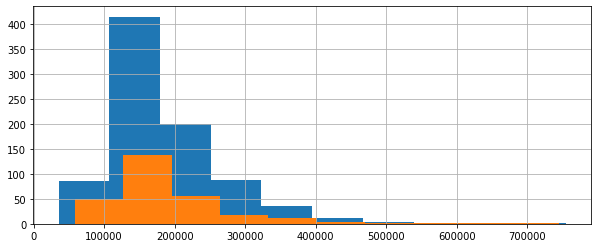

In [422]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# create a sample dataframe
df = dtfs[DS.HOUSES]
df_train, df_test = train_test_split(df, test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.SalePrice.hist(ax=ax)
df_test.SalePrice.hist(ax=ax)

X_train = df_train.drop('SalePrice', axis=1)
X_test = df_test.drop('SalePrice', axis=1)

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

# perform PCA to reduce the number of features
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_pca_df = pd.DataFrame(X_train_pca)
vif = calculate_vif(X_pca_df)
vif

Despite retaining the same number of variables as in the original data, it can be observed that the six variables are no longer correlated with each other following the PCA transformation. This enables us to use the new set of six variables as independent variables to predict housing prices.

However, it should be noted that this approach has a significant drawback. The PCA transformation does not maintain the identity of each variable, which makes interpreting the results difficult. To handle with that, we will seperate the feature we want to predict from the others.

By fitting a model with these variables, we can see that the structural multicollinearity has been addressed and any remaining multicollinearity is not severe enough to require further corrective measures.

Next, we will try to develop an approach that can identify and address multicollinearity in a robust and efficient manner.

# Experiments
We will check each one of the solutions we mentioned by comparing between them, the R-squared score, the Mean Absolute Error, the max error and the percentage of small and big mistakes. We will check all of that in 4 different datasets: House prices, Cars, Medical insurance and Cancer.

In [423]:
# Create a list of solutions accuracy scores
solution_names = ['Base model', 'Low', 'High', 'Transform', 'Combine', 'PCA']
r2_scores = []
mean_errors = []
max_errors = []
small_mistakes = []
big_mistakes = []

def draw_graph(measures, criterion):
    # Create a column diagram of measures for different solutions
    plt.bar(solution_names, measures)
    plt.title(criterion + ' of Different Solutions')
    plt.xlabel('Solution')
    plt.ylabel(criterion)
    plt.show()


# Dataset 1 - House Prices

### Identify Multi-Collinearity
As mentioned before, we examine the correlation matrix of all the independent variables. First, we applied this method to the housing dataset from the Kaggle competition, which aims to predict the sales price based on various housing-related features. In our analysis, we chose a subset of numerical variables to include in the model, and plotted their correlation matrix to check for any high correlations between them.

In [424]:
df = dtfs[DS.HOUSES]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386940,-0.198096,0.029522,-0.087859,0.025800,0.006645,0.040240,-0.070389,-0.075439,-0.145582,-0.247781,-0.252249,0.319328,0.024704,0.083365,-0.014681,0.012310,0.131278,0.203971,-0.032971,0.266012,0.047209,-0.031122,0.054701,-0.027411,-0.092607,-0.017988,0.004054,-0.017790,-0.039739,-0.021789,0.003166,-0.040689,-0.027170,-0.012448,-0.088032
LotFrontage,-0.386940,1.000000,0.421184,0.241322,-0.046312,0.109726,0.086414,0.189969,0.241352,0.049305,0.115306,0.387620,0.451085,0.075004,0.011148,0.396306,0.118088,0.000434,0.185785,0.045678,0.270404,-0.003546,0.348421,0.260321,0.069878,0.286587,0.356851,0.082166,0.161815,0.014261,0.069716,0.035906,0.211746,0.001471,0.018815,0.013267,0.344270
LotArea,-0.198096,0.421184,1.000000,0.167525,-0.034348,0.029205,0.026848,0.106115,0.230441,0.138234,0.011288,0.302554,0.329679,0.074612,0.020039,0.307164,0.179052,-0.014282,0.129073,0.045183,0.137269,-0.018942,0.237918,0.255755,0.013731,0.172428,0.211362,0.133576,0.099170,-0.023631,0.012520,0.072517,0.109147,0.012790,0.008998,-0.006904,0.299962
OverallQual,0.029522,0.241322,0.167525,1.000000,-0.163157,0.589385,0.570757,0.423988,0.249500,-0.068506,0.322663,0.563960,0.514453,0.273197,-0.008118,0.607466,0.126834,-0.053283,0.576875,0.251690,0.094882,-0.178735,0.451008,0.415294,0.560425,0.593803,0.550659,0.282512,0.340679,-0.144344,0.017331,0.055296,0.080131,-0.062064,0.079895,-0.008903,0.797881
OverallCond,-0.087859,-0.046312,-0.034348,-0.163157,1.000000,-0.426462,0.039402,-0.166762,-0.054788,0.042314,-0.148630,-0.192762,-0.164251,0.005985,0.048720,-0.112231,-0.060943,0.122960,-0.229848,-0.079023,0.004643,-0.092644,-0.096901,-0.022290,-0.343206,-0.267859,-0.226347,-0.010835,-0.076273,0.062748,-0.006861,0.087030,-0.023566,0.119772,-0.014236,0.041003,-0.124391
YearBuilt,0.025800,0.109726,0.029205,0.589385,-0.426462,1.000000,0.623171,0.332190,0.236941,-0.054414,0.177545,0.409134,0.308875,-0.011621,-0.164359,0.204967,0.182800,-0.049645,0.500495,0.220000,-0.061580,-0.171920,0.121417,0.133077,0.823520,0.532563,0.471286,0.238548,0.235432,-0.392693,0.027948,-0.063694,0.006717,-0.096973,0.013784,-0.004585,0.525394
YearRemodAdd,0.006645,0.086414,0.026848,0.570757,0.039402,0.623171,1.000000,0.193376,0.120774,-0.057024,0.199893,0.308696,0.281436,0.103627,-0.053479,0.290050,0.111897,-0.017049,0.467563,0.164203,-0.075812,-0.181803,0.181995,0.125898,0.645808,0.462663,0.407471,0.244602,0.260521,-0.214115,0.026304,-0.034288,0.019307,-0.040420,0.026884,0.041302,0.521253
MasVnrArea,0.040240,0.189969,0.106115,0.423988,-0.166762,0.332190,0.193376,1.000000,0.285331,-0.075261,0.110067,0.384434,0.363209,0.180567,-0.062930,0.414024,0.110379,-0.007035,0.285561,0.195273,0.114310,-0.023647,0.315604,0.252525,0.277095,0.375269,0.382162,0.174649,0.129532,-0.116832,0.022331,0.052646,0.021648,-0.054044,0.015850,-0.017569,0.488658
BsmtFinSF1,-0.070389,0.241352,0.230441,0.249500,-0.054788,0.236941,0.120774,0.285331,1.000000,-0.035780,-0.502225,0.530917,0.468020,-0.120823,-0.050824,0.239888,0.651727,0.061963,0.052313,0.007545,-0.104275,-0.062920,0.080207,0.270306,0.160356,0.196443,0.286657,0.206246,0.127900,-0.105410,0.021831,0.059635,0.194349,0.003027,-0.015281,0.010224,0.390301
BsmtFinSF2,-0.075439,0.049305,0.138234,-0.068506,0.042314,-0.054414,-0.057024,-0.075261,-0.035780,1.000000,-0.220190,0.094079,0.073090,-0.111850,0.015459,-0.038541,0.168559,0.059148,-0.082945,-0.031685,0.008975,-0.047693,-0.054900,0.022348,-0.075477,-0.075477,-0.047959,0.032338,0.010518,0.047221,-0.030848,0.067899,0.061212,0.014290,-0.036101,0.036395,-0.028021


In the case of the housing data from a Kaggle competition, it revealed several variables with high correlation to each other. For instance, the total basement surface area and first-floor surface area had a correlation of over 0.8 due to houses with larger basements tending to have bigger first-floor areas.

### Split the data to train and test

<AxesSubplot:>

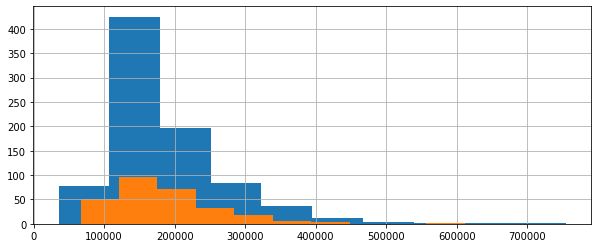

In [425]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.SalePrice.hist(ax=ax)
df_test.SalePrice.hist(ax=ax)

## Base Model

### Create a Baseline Regression Model

In [426]:
X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [427]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [428]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.746543116837693


In [429]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.134
Mean Absolute Error (Σ|y - pred|/n): 22,999
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 39,375
Max Error: 385,096


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='SalePrice'>

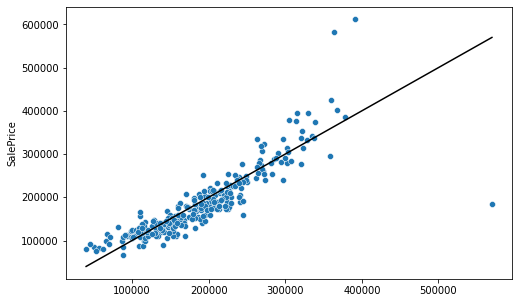

In [430]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [431]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.2846975088967972


How about more than 20%?

In [432]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.19572953736654805


## Variable Selection - Low Correlation

Let's see the vif scores of the origin data:

In [433]:
vif = calculate_vif(df)
vif

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_Factor
10,BsmtUnfSF,inf
15,GrLivArea,inf
8,BsmtFinSF1,inf
9,BsmtFinSF2,inf
11,TotalBsmtSF,inf
12,1stFlrSF,inf
13,2ndFlrSF,inf
14,LowQualFinSF,inf
24,GarageYrBlt,26816.53
35,YrSold,25815.20


Now, let's try to fix the collinearity. In the housing data example, we observed that Overall Quality and Ground living area have the two highest correlations with the dependent variable, SalePrice. Therefore, we will include them in the model and eliminate others with low correlation with SalePrice, for example lower than 0.3.

In [434]:
low_corr_cols = corr[corr['SalePrice'].abs() < 0.3].index.tolist()
                
new_df = df.drop(low_corr_cols, axis=1, inplace=False)
vif = calculate_vif(new_df)
vif

,features,vif_Factor
13,GarageYrBlt,23316.45
2,YearBuilt,17365.13
3,YearRemodAdd,12332.98
9,GrLivArea,1633.04
7,1stFlrSF,1001.31
8,2ndFlrSF,199.87
1,OverallQual,71.66
11,TotRmsAbvGrd,62.10
14,GarageCars,38.20
15,GarageArea,34.29


### Create a Baseline Regression Model

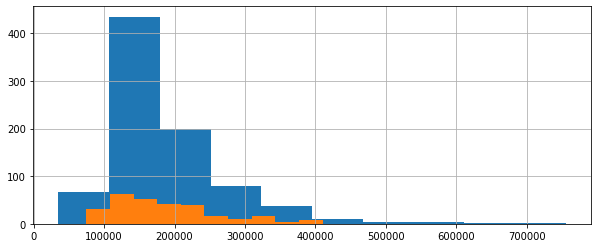

In [435]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.SalePrice.hist(ax=ax)
df_test.SalePrice.hist(ax=ax)

X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [436]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [437]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.7651813407790851


In [438]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.135
Mean Absolute Error (Σ|y - pred|/n): 22,415
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 35,381
Max Error: 357,190


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='SalePrice'>

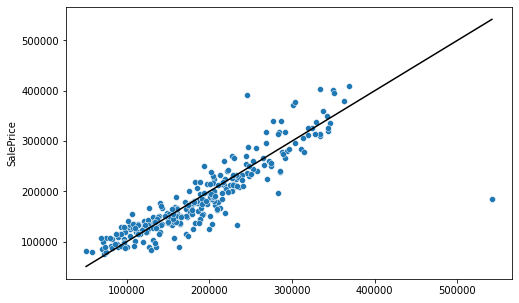

In [439]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [440]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.27402135231316727


How about more than 20%?

In [441]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.18505338078291814


## Variable Selection - High Correlation

Now, let's try to fix the collinearity. In the housing data example, we observed that Overall Quality and Ground living area have the two highest correlations with the dependent variable, SalePrice. Therefore, we will include them in the model and eliminate others with low correlation with SalePrice, for example lower than 0.5.

In [442]:
low_corr_cols = corr[corr['SalePrice'].abs() < 0.5].index.tolist()
                
new_df = df.drop(low_corr_cols, axis=1, inplace=False)
vif = calculate_vif(new_df)
vif

,features,vif_Factor
8,GarageYrBlt,22266.30
1,YearBuilt,15887.79
2,YearRemodAdd,11992.83
0,OverallQual,68.10
7,TotRmsAbvGrd,60.15
5,GrLivArea,49.32
4,1stFlrSF,40.21
9,GarageCars,37.34
10,GarageArea,32.21
3,TotalBsmtSF,27.66


### Create a Baseline Regression Model

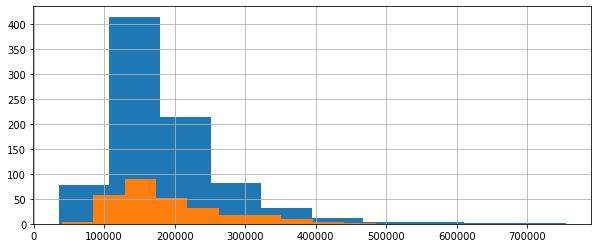

In [443]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.SalePrice.hist(ax=ax)
df_test.SalePrice.hist(ax=ax)

X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [444]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [445]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.8468296131400539


In [446]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.137
Mean Absolute Error (Σ|y - pred|/n): 23,517
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 30,455
Max Error: 138,568


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='SalePrice'>

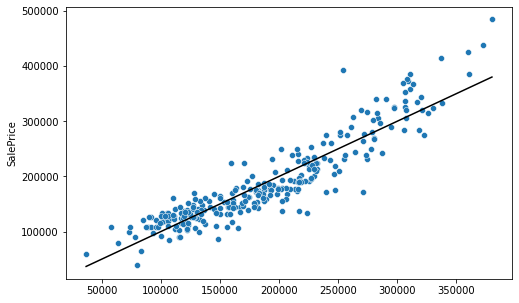

In [447]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [448]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.2099644128113879


How about more than 20%?

In [449]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.18861209964412812


## Variable Transformation
As we mentioned, we can use variable transformation to reduce the correlation between variables while maintaining their features. For example, in the housing data example, we transformed the variable 'YearBuilt' into 'House Age' by subtracting the current year from the year of built.

In [450]:
import datetime

current_year = datetime.datetime.now().year
new_df['Age'] = current_year - new_df['YearBuilt']
new_df = new_df.drop('YearBuilt', axis=1, inplace=False)
vif = calculate_vif(new_df)
vif


,features,vif_Factor
1,YearRemodAdd,13223.55
7,GarageYrBlt,12974.96
0,OverallQual,72.49
6,TotRmsAbvGrd,60.80
4,GrLivArea,51.18
3,1stFlrSF,40.33
8,GarageCars,37.86
9,GarageArea,31.21
2,TotalBsmtSF,27.43
10,SalePrice,25.69


By applying these methods, we can reduce the VIF values and improve the stability and interpretability of the model.

### Create a Baseline Regression Model

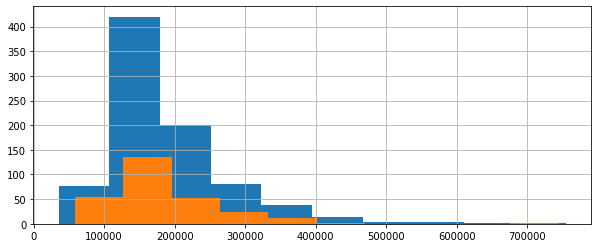

In [451]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.SalePrice.hist(ax=ax)
df_test.SalePrice.hist(ax=ax)

X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [452]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [453]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.6115694261440164


In [454]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.145
Mean Absolute Error (Σ|y - pred|/n): 24,873
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 48,069
Max Error: 599,887


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='SalePrice'>

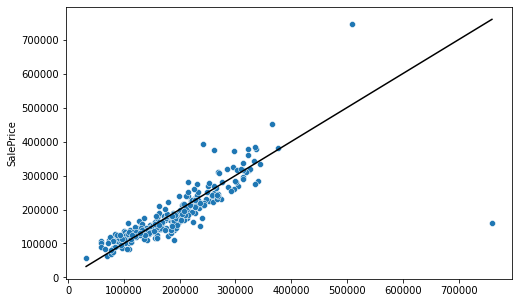

In [455]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [456]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.2526690391459075


How about more than 20%?

In [457]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.21352313167259787


## Linearly Combination
As we mentioned, we can use linearly combination of the independent variables to reduce the correlation between variables while maintaining their features. We will show the correlation matrix and choose two independent variables and combine them.

In [458]:
new_df = dtfs[DS.HOUSES]
corr = new_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386940,-0.198096,0.029522,-0.087859,0.025800,0.006645,0.040240,-0.070389,-0.075439,-0.145582,-0.247781,-0.252249,0.319328,0.024704,0.083365,-0.014681,0.012310,0.131278,0.203971,-0.032971,0.266012,0.047209,-0.031122,0.054701,-0.027411,-0.092607,-0.017988,0.004054,-0.017790,-0.039739,-0.021789,0.003166,-0.040689,-0.027170,-0.012448,-0.088032
LotFrontage,-0.386940,1.000000,0.421184,0.241322,-0.046312,0.109726,0.086414,0.189969,0.241352,0.049305,0.115306,0.387620,0.451085,0.075004,0.011148,0.396306,0.118088,0.000434,0.185785,0.045678,0.270404,-0.003546,0.348421,0.260321,0.069878,0.286587,0.356851,0.082166,0.161815,0.014261,0.069716,0.035906,0.211746,0.001471,0.018815,0.013267,0.344270
LotArea,-0.198096,0.421184,1.000000,0.167525,-0.034348,0.029205,0.026848,0.106115,0.230441,0.138234,0.011288,0.302554,0.329679,0.074612,0.020039,0.307164,0.179052,-0.014282,0.129073,0.045183,0.137269,-0.018942,0.237918,0.255755,0.013731,0.172428,0.211362,0.133576,0.099170,-0.023631,0.012520,0.072517,0.109147,0.012790,0.008998,-0.006904,0.299962
OverallQual,0.029522,0.241322,0.167525,1.000000,-0.163157,0.589385,0.570757,0.423988,0.249500,-0.068506,0.322663,0.563960,0.514453,0.273197,-0.008118,0.607466,0.126834,-0.053283,0.576875,0.251690,0.094882,-0.178735,0.451008,0.415294,0.560425,0.593803,0.550659,0.282512,0.340679,-0.144344,0.017331,0.055296,0.080131,-0.062064,0.079895,-0.008903,0.797881
OverallCond,-0.087859,-0.046312,-0.034348,-0.163157,1.000000,-0.426462,0.039402,-0.166762,-0.054788,0.042314,-0.148630,-0.192762,-0.164251,0.005985,0.048720,-0.112231,-0.060943,0.122960,-0.229848,-0.079023,0.004643,-0.092644,-0.096901,-0.022290,-0.343206,-0.267859,-0.226347,-0.010835,-0.076273,0.062748,-0.006861,0.087030,-0.023566,0.119772,-0.014236,0.041003,-0.124391
YearBuilt,0.025800,0.109726,0.029205,0.589385,-0.426462,1.000000,0.623171,0.332190,0.236941,-0.054414,0.177545,0.409134,0.308875,-0.011621,-0.164359,0.204967,0.182800,-0.049645,0.500495,0.220000,-0.061580,-0.171920,0.121417,0.133077,0.823520,0.532563,0.471286,0.238548,0.235432,-0.392693,0.027948,-0.063694,0.006717,-0.096973,0.013784,-0.004585,0.525394
YearRemodAdd,0.006645,0.086414,0.026848,0.570757,0.039402,0.623171,1.000000,0.193376,0.120774,-0.057024,0.199893,0.308696,0.281436,0.103627,-0.053479,0.290050,0.111897,-0.017049,0.467563,0.164203,-0.075812,-0.181803,0.181995,0.125898,0.645808,0.462663,0.407471,0.244602,0.260521,-0.214115,0.026304,-0.034288,0.019307,-0.040420,0.026884,0.041302,0.521253
MasVnrArea,0.040240,0.189969,0.106115,0.423988,-0.166762,0.332190,0.193376,1.000000,0.285331,-0.075261,0.110067,0.384434,0.363209,0.180567,-0.062930,0.414024,0.110379,-0.007035,0.285561,0.195273,0.114310,-0.023647,0.315604,0.252525,0.277095,0.375269,0.382162,0.174649,0.129532,-0.116832,0.022331,0.052646,0.021648,-0.054044,0.015850,-0.017569,0.488658
BsmtFinSF1,-0.070389,0.241352,0.230441,0.249500,-0.054788,0.236941,0.120774,0.285331,1.000000,-0.035780,-0.502225,0.530917,0.468020,-0.120823,-0.050824,0.239888,0.651727,0.061963,0.052313,0.007545,-0.104275,-0.062920,0.080207,0.270306,0.160356,0.196443,0.286657,0.206246,0.127900,-0.105410,0.021831,0.059635,0.194349,0.003027,-0.015281,0.010224,0.390301
BsmtFinSF2,-0.075439,0.049305,0.138234,-0.068506,0.042314,-0.054414,-0.057024,-0.075261,-0.035780,1.000000,-0.220190,0.094079,0.073090,-0.111850,0.015459,-0.038541,0.168559,0.059148,-0.082945,-0.031685,0.008975,-0.047693,-0.054900,0.022348,-0.075477,-0.075477,-0.047959,0.032338,0.010518,0.047221,-0.030848,0.067899,0.061212,0.014290,-0.036101,0.036395,-0.028021


For example, in the houses data example, we will choose transform the variables 'GrLivArea' and '2ndFlrSF' into 'new_area' such that new_area = GrLivArea + 2ndFlrSF because the idea is to increase the area by summing the both the areas.

In [459]:
new_df['new_area'] = new_df['GrLivArea'] + new_df['2ndFlrSF']
new_df = new_df.drop('GrLivArea', axis=1, inplace=False)
new_df = new_df.drop('2ndFlrSF', axis=1, inplace=False)

vif = calculate_vif(new_df)
vif

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,vif_Factor
8,BsmtFinSF1,inf
9,BsmtFinSF2,inf
10,BsmtUnfSF,inf
11,TotalBsmtSF,inf
22,GarageYrBlt,26816.53
33,YrSold,25815.20
5,YearBuilt,24962.20
6,YearRemodAdd,24548.35
20,TotRmsAbvGrd,84.68
3,OverallQual,83.90


By applying these methods, we can reduce the VIF values and improve the stability and interpretability of the model.

### Create a Baseline Regression Model

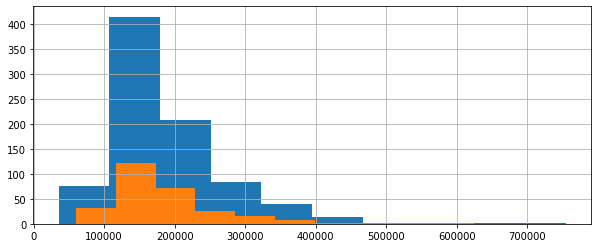

In [460]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.SalePrice.hist(ax=ax)
df_test.SalePrice.hist(ax=ax)

X_train = df_train.drop('SalePrice',axis=1)
X_test = df_test.drop('SalePrice',axis=1)

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

In [461]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [462]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.748523225407657


In [463]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.143
Mean Absolute Error (Σ|y - pred|/n): 25,646
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 42,128
Max Error: 384,688


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='SalePrice'>

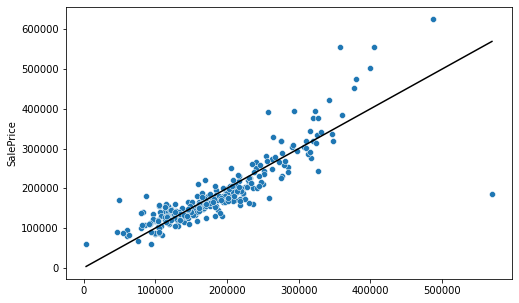

In [464]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [465]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.2597864768683274


How about more than 20%?

In [466]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.20640569395017794


## PCA - Principal Component Analsys
PCA, or Principal Component Analysis, is a widely used technique in data analysis that involves breaking down a dataset into a set of independent factors, with the aim of reducing its dimensionality. This technique is often used to simplify calculations in statistical models, by reducing the number of predictive factors. However, in the context of our current case, we will be leveraging the independence of variables provided by PCA to address the issue of multicollinearity in our model.

,features,vif_Factor
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0


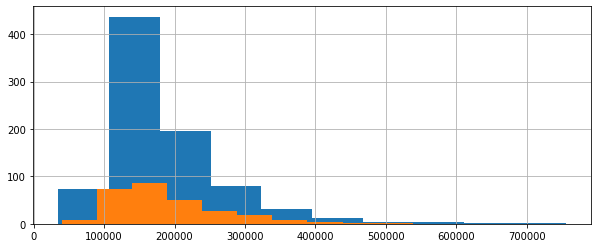

In [467]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# create a sample dataframe
df = dtfs[DS.HOUSES]
df_train, df_test = train_test_split(df, test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.SalePrice.hist(ax=ax)
df_test.SalePrice.hist(ax=ax)

X_train = df_train.drop('SalePrice', axis=1)
X_test = df_test.drop('SalePrice', axis=1)

y_train = df_train['SalePrice']
y_test = df_test['SalePrice']

# perform PCA to reduce the number of features
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_pca_df = pd.DataFrame(X_train_pca)
vif = calculate_vif(X_pca_df)
vif

Despite retaining the same number of variables as in the original data, it can be observed that the six variables are no longer correlated with each other following the PCA transformation. This enables us to use the new set of six variables as independent variables to predict housing prices.

However, it should be noted that this approach has a significant drawback. The PCA transformation does not maintain the identity of each variable, which makes interpreting the results difficult. To handle with that, we seperated the SalePrice from the other features.

By applying these methods, we can reduce the VIF values and improve the stability and interpretability of the model.

### Create a Baseline Regression Model

In [468]:
from sklearn.linear_model import LinearRegression

# train a linear regression model on the reduced features
model = LinearRegression()
model.fit(X_train_pca, y_train)

# predict the target feature on the test data using the reduced features
prediction = model.predict(X_test_pca)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [469]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.6526728357636057


In [470]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.186
Mean Absolute Error (Σ|y - pred|/n): 32,091
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 45,127
Max Error: 194,570


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='SalePrice'>

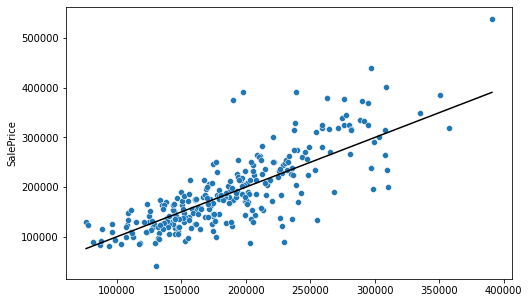

In [471]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [472]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.2099644128113879


How about more than 20%?

In [473]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.3096085409252669


## Conclusions - House Prices
Now we can compare between the solutions:

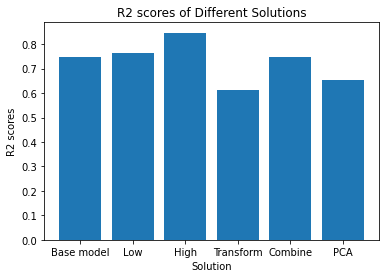

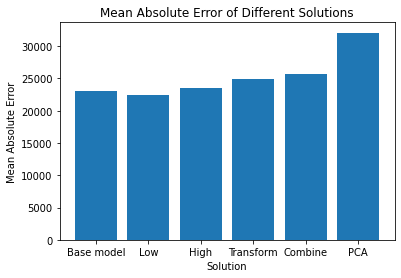

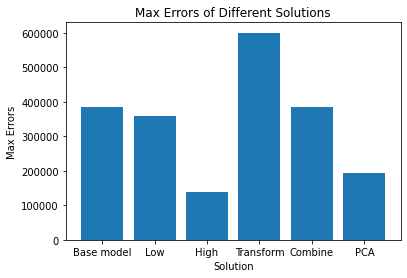

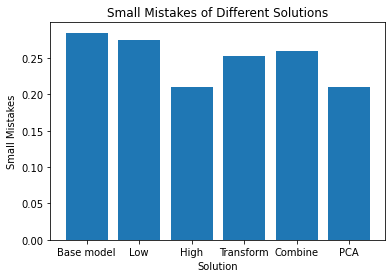

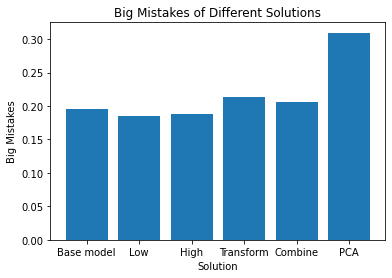

In [474]:
draw_graph(r2_scores, 'R2 scores')
draw_graph(mean_errors, 'Mean Absolute Error')
draw_graph(max_errors, 'Max Errors')
draw_graph(small_mistakes, 'Small Mistakes')
draw_graph(big_mistakes, 'Big Mistakes')

r2_scores = []
mean_errors = []
max_errors = []
small_mistakes = []
big_mistakes = []

We can see that in the origin dataset with all the columns there are features with infinity correlation with SalePrice and most of them vif above 10. 

When we dropped of the columns which has lower correlation than 0.3 with 'SalePrice' we got 19 features, almost all of them has lower vif score than before, the highest vif is of 'GarageYrBlt' 19941 and it was 22954 before. 

When we dropped of the columns which has lower correlation than 0.5 with 'SalePrice' we got 11 features, almost all of them has lower vif score than before, the highest vif is of 'YearBuilt' 8173 and it was 21,617 before. 

Also, we tried to change 'YearBuilt' to 'Age' by substracting the value of 'YearBuilt' from the current year (from the model with the features which has lower correlation than 0.3). The vif score of almost all the features was decreased, the highest vif is of 'YearRemodAdd' 12579 and it was 22471 before. 

Additionally, we tried to use linearly combination of the independent variables to reduce the correlation between variables while maintaining their features, the idea is to increase the area by summing the both the areas. Now, there are 4 infinities vifs instead of 8.

Finally, we used PCA to reduce its dimensionality and remove the multi-collinearity issue in the model. Despite retaining the same number of variables as in the original data, it can be observed that the six variables are no longer correlated with each other following the PCA transformation. This enables us to use the new set of six variables as independent variables to predict housing prices. 

The best R-Squared score was when we removed variables with high correlation with the 'SalePrice' and the worst were the transform and the PCA. The best MSE was when we used low correlation but the others were close and the worst was PCA by far. The best max error was when we used high correlation and then when we used PCA, and the worst when we used transform by far.

The most small mistakes were when we used the base model and low correlation and the fewest small mistakes were when we used high correlation and PCA. The most big mistakes were when we used the PCA by far and the fewest big mistakes were when we used low or high correlation but the others were close.

From this, we can infer that dropping columns which has lower correlation than 0.3 with 'SalePrice' gives us good results but the best results were when we dropped columns which had lower correlation than 0.5 and also  there are higher vif scores when we tried higher correlation. This time variable transformation and PCA didn't succeed to improve the results of the base model.

# Dataset 2 - Cars
This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

### Identify Multi-Collinearity
As mentioned before, we examine the correlation matrix of all the independent variables. Now, we applied this method to the cars dataset from the Kaggle competition, which aims to predict the sales price based on various car-related features. In our analysis, we chose a subset of numerical variables to include in the model, and plotted their correlation matrix to check for any high correlations between them.

In [475]:
df = dtfs[DS.VEHICLES]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,selling_price,km_driven,owner
year,1.000000,0.550703,-0.462836,-0.442426
selling_price,0.550703,1.000000,-0.243153,-0.290810
km_driven,-0.462836,-0.243153,1.000000,0.360041
owner,-0.442426,-0.290810,0.360041,1.000000


In the case of the cars data from a Kaggle competition, it revealed several variables with high correlation to each other. For instance, the total 'year' and 'km_driven' had a correlation of over 0.4 due to cars which are on the road a few years and drove a lot of km.

### Split the data to train and test

<AxesSubplot:>

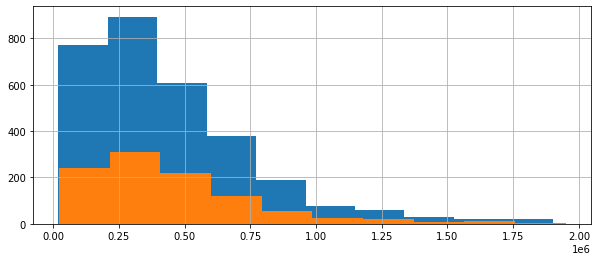

In [476]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.selling_price.hist(ax=ax)
df_test.selling_price.hist(ax=ax)

## Base Model


### Create a Baseline Regression Model

In [477]:
X_train = df_train.drop('selling_price',axis=1)
X_test = df_test.drop('selling_price',axis=1)

y_train = df_train['selling_price']
y_test = df_test['selling_price']

In [478]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print(X_train)
prediction = model.fit(X_train,y_train).predict(X_test)

      year  km_driven  owner
1416  2014      72000      2
2420  2018      21302      1
4032  2017      60000      1
213   2019      15000      1
3520  2018      80000      1
...    ...        ...    ...
4263  2009      50000      1
1330  2015      80000      2
3756  2012      38000      1
1108  2012      82000      1
3015  2015      90000      1

[3051 rows x 3 columns]


### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [479]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.28330134964950693


In [480]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.589
Mean Absolute Error (Σ|y - pred|/n): 187,856
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 277,400
Max Error: 1,379,105


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='selling_price'>

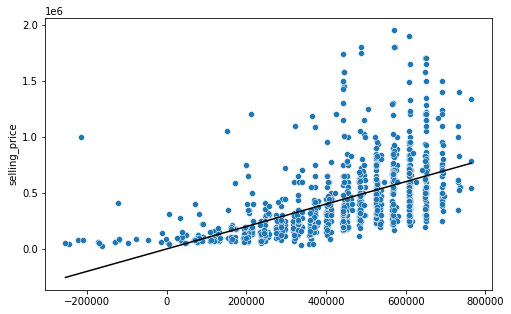

In [481]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [482]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.08055009823182711


How about more than 20%?

In [483]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.6846758349705304


Let's see the vif scores of the origin data:

In [484]:
vif = calculate_vif(df)
vif

,features,vif_Factor
0,year,12.12
3,owner,7.30
2,km_driven,4.55
1,selling_price,3.20


## Variable Selection - Low Correlation

Now, let's try to fix the collinearity. In the cars data example, we observed that owner and year have the two highest correlations with the dependent variable, selling_price. Therefore, we will include them in the model and eliminate the others with low correlation with SalePrice, for example lower than 0.2.

In [485]:
low_corr_cols = corr[corr['selling_price'].abs() < 0.2].index.tolist()
                
new_df = df.drop(low_corr_cols, axis=1, inplace=False)
vif = calculate_vif(new_df)
vif

,features,vif_Factor
0,year,12.12
3,owner,7.30
2,km_driven,4.55
1,selling_price,3.20


### Create a Baseline Regression Model

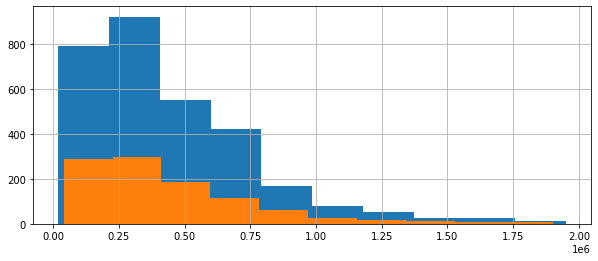

In [486]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.selling_price.hist(ax=ax)
df_test.selling_price.hist(ax=ax)

X_train = df_train.drop('selling_price',axis=1)
X_test = df_test.drop('selling_price',axis=1)

y_train = df_train['selling_price']
y_test = df_test['selling_price']

In [487]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [488]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.3173646982790226


In [489]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.605
Mean Absolute Error (Σ|y - pred|/n): 187,862
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 275,927
Max Error: 1,315,105


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='selling_price'>

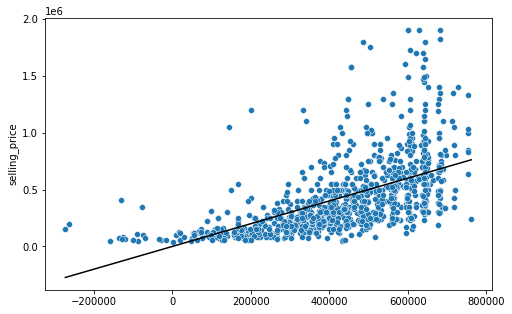

In [490]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [491]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.06581532416502947


How about more than 20%?

In [492]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.68762278978389


## Variable Selection - High Correlation

Again, let's try to fix the collinearity. In the cars data example, we observed that year has the highest correlation with the dependent variable, selling_price. Therefore, we will include only that in the model and eliminate others, in this case the correlation lower than 0.4.

In [493]:
low_corr_cols = corr[corr['selling_price'].abs() < 0.4].index.tolist()
new_df = df.drop(low_corr_cols, axis=1, inplace=False)
vif = calculate_vif(new_df)
vif

,features,vif_Factor
0,year,2.86
1,selling_price,2.86


### Create a Baseline Regression Model

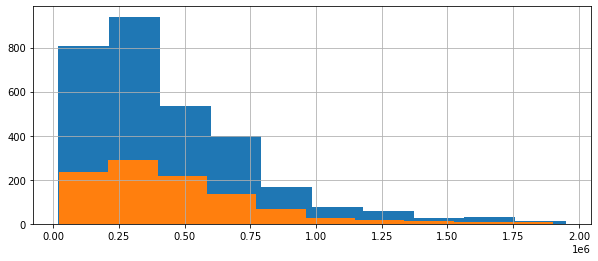

In [494]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.selling_price.hist(ax=ax)
df_test.selling_price.hist(ax=ax)

X_train = df_train.drop('selling_price',axis=1)
X_test = df_test.drop('selling_price',axis=1)

y_train = df_train['selling_price']
y_test = df_test['selling_price']

In [495]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [496]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.28674770117519766


In [497]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.616
Mean Absolute Error (Σ|y - pred|/n): 186,640
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 275,464
Max Error: 1,325,854


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='selling_price'>

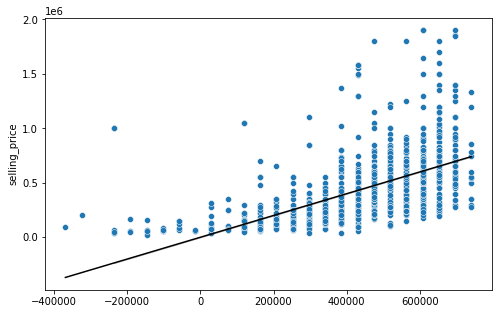

In [498]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [499]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.0825147347740668


How about more than 20%?

In [500]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.6827111984282908


## Variable Transformation
As we mentioned, we can use variable transformation to reduce the correlation between variables while maintaining their features. For example, in the cars data example, we transformed the variable 'year' into 'Car Age' by subtracting the current year from the year of manufacture.

In [501]:
import datetime

# Get the better result which was with columns with at least 0.3 correlatation
low_corr_cols = corr[corr['selling_price'].abs() < 0.2].index.tolist()
new_df = df.drop(low_corr_cols, axis=1, inplace=False)

current_year = datetime.datetime.now().year
new_df['Age'] = current_year - new_df['year']
new_df = new_df.drop('year', axis=1, inplace=False)
vif = calculate_vif(new_df)
vif


,features,vif_Factor
3,Age,7.72
2,owner,7.01
1,km_driven,5.10
0,selling_price,1.83


By applying these methods, we can reduce the VIF values and improve the stability and interpretability of the model.

### Create a Baseline Regression Model

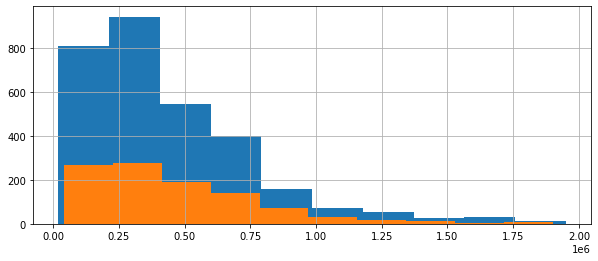

In [502]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.selling_price.hist(ax=ax)
df_test.selling_price.hist(ax=ax)

X_train = df_train.drop('selling_price',axis=1)
X_test = df_test.drop('selling_price',axis=1)

y_train = df_train['selling_price']
y_test = df_test['selling_price']

In [503]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [504]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.3064942839220387


In [505]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.594
Mean Absolute Error (Σ|y - pred|/n): 187,466
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 271,543
Max Error: 1,363,584


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='selling_price'>

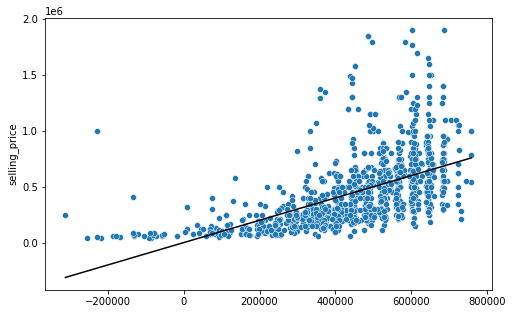

In [506]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [507]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.08546168958742632


How about more than 20%?

In [508]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.6954813359528488


## Linearly Combination
As we mentioned, we can use linearly combination of the independent variables to reduce the correlation between variables while maintaining their features. We will show the correlation matrix and choose two independent variables and combine them.

In [509]:
new_df = dtfs[DS.VEHICLES]
corr = new_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,selling_price,km_driven,owner
year,1.000000,0.550703,-0.462836,-0.442426
selling_price,0.550703,1.000000,-0.243153,-0.290810
km_driven,-0.462836,-0.243153,1.000000,0.360041
owner,-0.442426,-0.290810,0.360041,1.000000


For example, in the cars data example, we will choose transform the variables 'year' and 'owner' into 'new_year' such that new_year = owner * 3 + year because the idea is to increase the 'year' beacuse it affects probably more on the 'selling_price'.

In [510]:
new_df['new_year'] = new_df['owner'] * 3 + new_df['year']
new_df = new_df.drop('owner', axis=1, inplace=False)
new_df = new_df.drop('year', axis=1, inplace=False)

vif = calculate_vif(new_df)
vif

,features,vif_Factor
2,new_year,7.21
1,km_driven,4.11
0,selling_price,3.04


By applying these methods, we can reduce the VIF values and improve the stability and interpretability of the model.

### Create a Baseline Regression Model

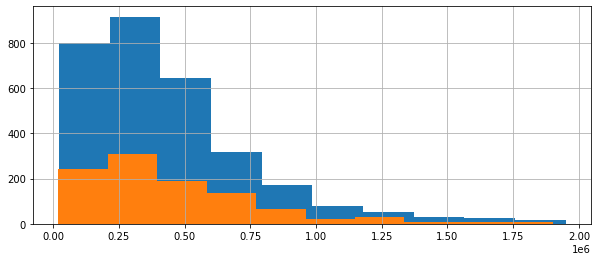

In [511]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.selling_price.hist(ax=ax)
df_test.selling_price.hist(ax=ax)

X_train = df_train.drop('selling_price',axis=1)
X_test = df_test.drop('selling_price',axis=1)

y_train = df_train['selling_price']
y_test = df_test['selling_price']

In [512]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [513]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.2197615747141317


In [514]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.708
Mean Absolute Error (Σ|y - pred|/n): 206,199
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 294,284
Max Error: 1,424,488


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='selling_price'>

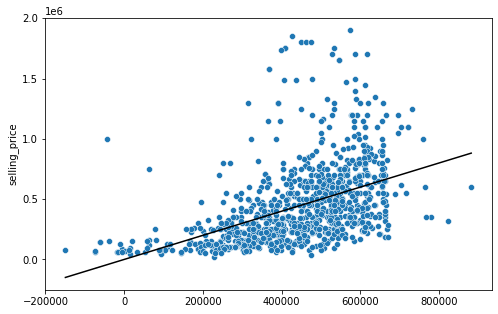

In [515]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [516]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.05697445972495088


How about more than 20%?

In [517]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.7534381139489195


## PCA - Principal Component Analsys
PCA, or Principal Component Analysis, is a widely used technique in data analysis that involves breaking down a dataset into a set of independent factors, with the aim of reducing its dimensionality. This technique is often used to simplify calculations in statistical models, by reducing the number of predictive factors. However, in the context of our current case, we will be leveraging the independence of variables provided by PCA to address the issue of multicollinearity in our model.

,features,vif_Factor
0,0,1.0
1,1,1.0


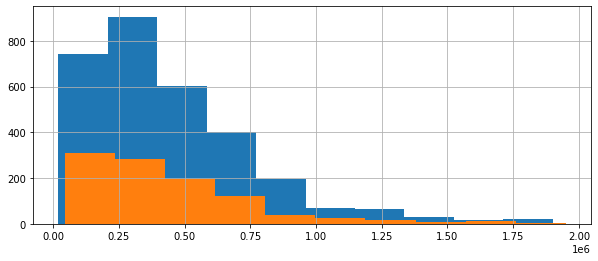

In [518]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# create a sample dataframe
df = dtfs[DS.VEHICLES]
df_train, df_test = train_test_split(df, test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.selling_price.hist(ax=ax)
df_test.selling_price.hist(ax=ax)

X_train = df_train.drop('selling_price', axis=1)
X_test = df_test.drop('selling_price', axis=1)

y_train = df_train['selling_price']
y_test = df_test['selling_price']

# perform PCA to reduce the number of features
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_pca_df = pd.DataFrame(X_train_pca)
vif = calculate_vif(X_pca_df)
vif

Despite retaining the same number of variables as in the original data, it can be observed that the two variables are no longer correlated with each other following the PCA transformation. This enables us to use the new set of six variables as independent variables to predict housing prices.

However, it should be noted that this approach has a significant drawback. The PCA transformation does not maintain the identity of each variable, which makes interpreting the results difficult. To handle with that, we seperated the SalePrice from the other features.

By applying these methods, we can reduce the VIF values and improve the stability and interpretability of the model.

### Create a Baseline Regression Model

In [519]:
from sklearn.linear_model import LinearRegression

# train a linear regression model on the reduced features
model = LinearRegression()
model.fit(X_train_pca, y_train)

# predict the target feature on the test data using the reduced features
prediction = model.predict(X_test_pca)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [520]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.2682734318981671


In [521]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.625
Mean Absolute Error (Σ|y - pred|/n): 190,767
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 281,454
Max Error: 1,424,871


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='selling_price'>

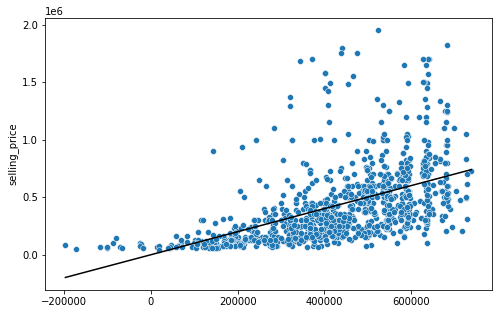

In [522]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [523]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.06974459724950884


How about more than 20%?

In [524]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.6905697445972495


## Conclusions - Car Prices
Now we can compare between the solutions:

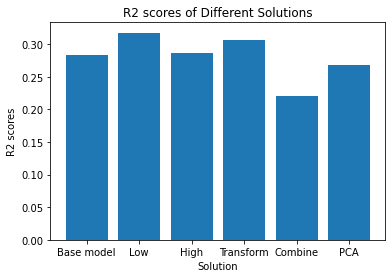

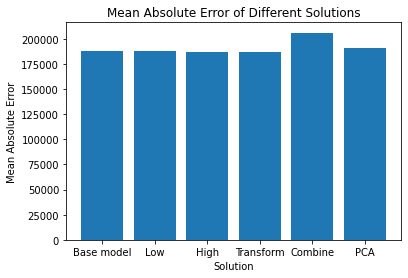

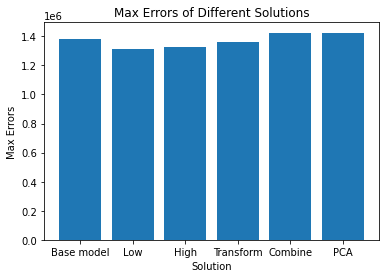

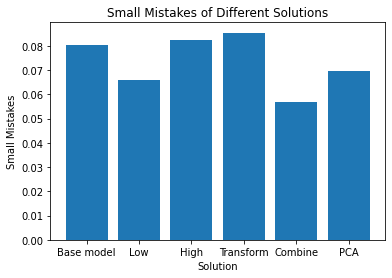

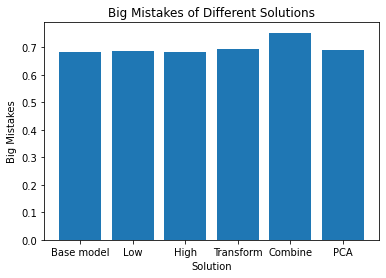

In [525]:
draw_graph(r2_scores, 'R2 scores')
draw_graph(mean_errors, 'Mean Absolute Error')
draw_graph(max_errors, 'Max Errors')
draw_graph(small_mistakes, 'Small Mistakes')
draw_graph(big_mistakes, 'Big Mistakes')

r2_scores = []
mean_errors = []
max_errors = []
small_mistakes = []
big_mistakes = []

We can see that in the origin dataset with all the columns there are features with high correlation with 'selling_price' and the vif scores are relatively high, 3 of 5 got vif above 5. 

When we dropped of the columns which has lower correlation than 0.3 with 'selling_price' we removed 'transmission' and 'km_driven', all of them has lower vif score than before, the highest vif is of 'year' 6.99 and it was 21.37 before. 

When we dropped of the columns which has lower correlation than 0.4 with 'selling_price' we removed also owner, all of them has lower vif score than before, the highest vif is of 'year' 71.76 and it was 6.99 before. 

Also, we tried to change 'year' to 'Car Age' by substracting the value of 'year' from the current year (from the model with the features which has lower correlation than 0.3 and was better). The vif score of 2 of 3 of the features was decreased, the highest vif is of 'owner' 5.87 and it was 5.39 before. The R-Squared score was 0.139, the Mean Absolute Error is 294,686 and the max error in the price was 8,230,253. 8.2% of the samples had a mistake lower than 5% and 76.1% of the samples had a mistake bigger than 20%.

Additionaly, we tried to use linearly combination of the independent variables to reduce the correlation between variables while maintaining their features. The idea is to increase the 'year' beacuse it affects probably more on the 'selling_price'. The highest vif is of 'new_year' 7.21.

Finally, we used PCA to reduce its dimensionality and remove the multi-collinearity issue in the model. Despite retaining the same number of variables as in the original data, it can be observed that the two variables are no longer correlated with each other following the PCA transformation. This enables us to use the new set of two variables as independent variables to predict housing prices.

The best R-Squared score was when we removed variables with low correlation with the 'SalePrice' or used variable transform and the worst were the linearly combination by far. The worst MSE was when we used linearly combination and all the others were better but close each other.The best max error was when we used low correlation and all the others were worse but close each other.

The most small mistakes were when we used the variable tranformation and high correlation and the fewest small mistakes were when we used linearly combination. The most big mistakes were also when we used the linearly combination and all the others were better but close each other.

From this, we can infer that dropping columns which has lower correlation than 0.3 with 'selling_price' gives us good results although there were higher vif scores when we tried higher correlation. Also the variable transformation gives us good results. This time linearly combination didn't succeed to improve the results of the base model.

# Dataset 3 - Medical Cost Personal
This dataset contains information about insurance cost.
This data can be used for a lot of purposes such as cost prediction to exemplify the use of linear regression in Machine Learning. It's features are age, sex, bmi, children, smoker, region and charges.

### Identify Multi-Collinearity
As mentioned before, we examine the correlation matrix of all the independent variables. Now, we applied this method to the medical dataset from the Kaggle competition, which aims to predict the charges price based on various personal-related features. In our analysis, we chose a subset of numerical variables to include in the model, and plotted their correlation matrix to check for any high correlations between them.

In [526]:
df = dtfs[DS.MEDICAL]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


In the case of the cars data from a Kaggle competition, it revealed several variables with high correlation to each other. For instance, the total 'charges' and 'smoker' had a correlation of over 0.7 due to smmoker people that tend to get sick and use the insurance more.

### Split the data to train and test

<AxesSubplot:>

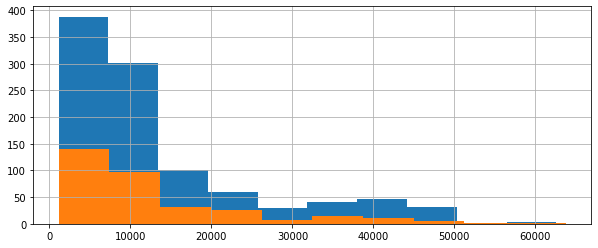

In [527]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.charges.hist(ax=ax)
df_test.charges.hist(ax=ax)

## Base Model


### Create a Baseline Regression Model

In [528]:
X_train = df_train.drop('charges',axis=1)
X_test = df_test.drop('charges',axis=1)

y_train = df_train['charges']
y_test = df_test['charges']

In [529]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
print(X_train)
prediction = model.fit(X_train,y_train).predict(X_test)

      age     bmi  children  smoker
177    54  29.200         1       0
1270   26  33.915         1       0
269    49  25.840         1       0
274    25  27.550         0       0
398    64  25.600         2       0
...   ...     ...       ...     ...
1186   20  35.625         3       1
270    18  29.370         1       0
628    58  38.000         0       0
1254   34  27.720         0       0
82     22  37.620         1       1

[1003 rows x 4 columns]


### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [530]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.73158358690224


In [531]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.452
Mean Absolute Error (Σ|y - pred|/n): 4,151
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 5,987
Max Error: 22,373


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='charges'>

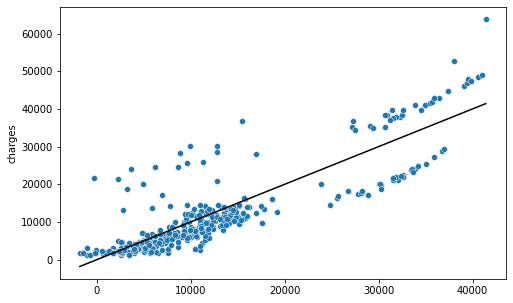

In [532]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [533]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.09253731343283582


How about more than 20%?

In [534]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.6328358208955224


Let's see the vif scores of the origin data:

In [535]:
vif = calculate_vif(df)
vif

,features,vif_Factor
0,age,9.18
1,bmi,8.06
4,charges,7.83
3,smoker,3.95
2,children,1.80


## Variable Selection - Low Correlation

Now, let's try to fix the collinearity. In the cars data example, we observed that smoker and age have the two highest correlations with the dependent variable, charges. Therefore, we will include them in the model and eliminate the others with low correlation with charges, for example lower than 0.1.

In [536]:
low_corr_cols = corr[corr['charges'].abs() < 0.1].index.tolist()
                
new_df = df.drop(low_corr_cols, axis=1, inplace=False)
vif = calculate_vif(new_df)
vif

,features,vif_Factor
0,age,9.13
3,charges,7.81
1,bmi,7.69
2,smoker,3.94


### Create a Baseline Regression Model

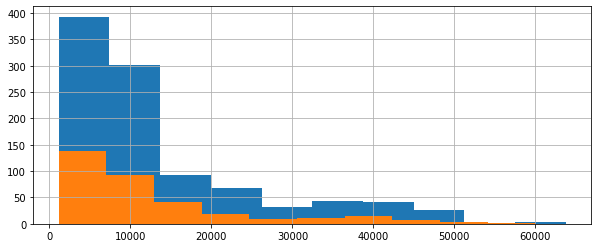

In [537]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.charges.hist(ax=ax)
df_test.charges.hist(ax=ax)

X_train = df_train.drop('charges',axis=1)
X_test = df_test.drop('charges',axis=1)

y_train = df_train['charges']
y_test = df_test['charges']

In [538]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [539]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.786740574168129


In [540]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.442
Mean Absolute Error (Σ|y - pred|/n): 3,851
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 5,402
Max Error: 23,197


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='charges'>

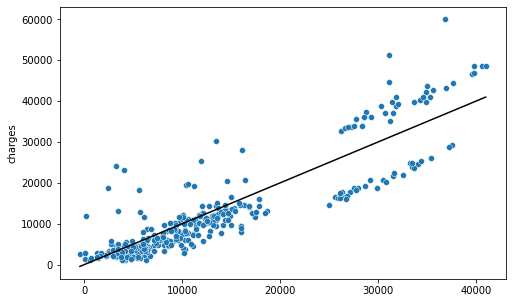

In [541]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [542]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.06865671641791045


How about more than 20%?

In [543]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.6119402985074627


## Variable Selection - High Correlation

Again, let's try to fix the collinearity. In the medical data example, we observed that smoker and age have the highest correlation with the dependent variable, charges. Therefore, we will include only that in the model and eliminate the others, in this case the correlation lower than 0.2.

In [544]:
low_corr_cols = corr[corr['charges'].abs() < 0.2].index.tolist()
new_df = df.drop(low_corr_cols, axis=1, inplace=False)
vif = calculate_vif(new_df)
vif

,features,vif_Factor
2,charges,7.78
1,smoker,3.94
0,age,3.28


### Create a Baseline Regression Model

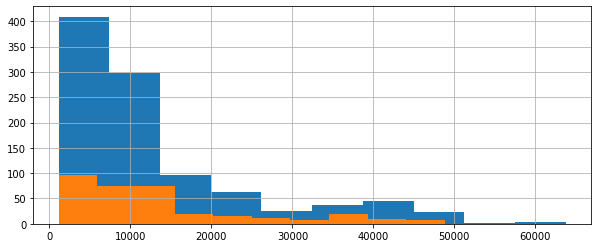

In [545]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.charges.hist(ax=ax)
df_test.charges.hist(ax=ax)

X_train = df_train.drop('charges',axis=1)
X_test = df_test.drop('charges',axis=1)

y_train = df_train['charges']
y_test = df_test['charges']

In [546]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [547]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.7161369976333405


In [548]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.317
Mean Absolute Error (Σ|y - pred|/n): 4,118
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 6,253
Max Error: 22,953


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='charges'>

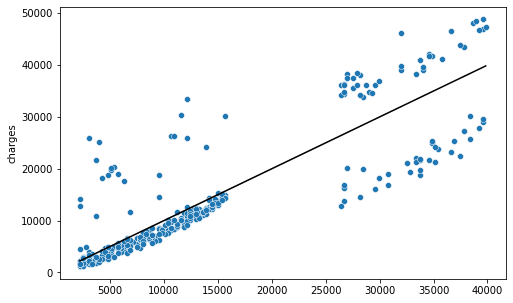

In [549]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [550]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.07462686567164178


How about more than 20%?

In [551]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.5850746268656717


## Variable Transformation
As we mentioned, we can use variable transformation to reduce the correlation between variables while maintaining their features. For example, in the medical data example, we transformed the variable 'bmi' into 'new_bmi' by subtracting a minimal bmi (15) from the bmi.

In [552]:
new_df = dtfs[DS.MEDICAL]

# Get the better result which was with columns with at least 0.1 correlatation
low_corr_cols = corr[corr['charges'].abs() < 0.1].index.tolist()
new_df = df.drop(low_corr_cols, axis=1, inplace=False)

# If the person smokes so we multiply the age by 1.2 and otherwise by 1
new_df['new_bmi'] = new_df['bmi'] - 15
new_df = new_df.drop('bmi', axis=1, inplace=False)

vif = calculate_vif(new_df)
vif

,features,vif_Factor
2,charges,8.01
0,age,6.17
3,new_bmi,5.05
1,smoker,3.96


By applying these methods, we can reduce the VIF values and improve the stability and interpretability of the model.

### Create a Baseline Regression Model

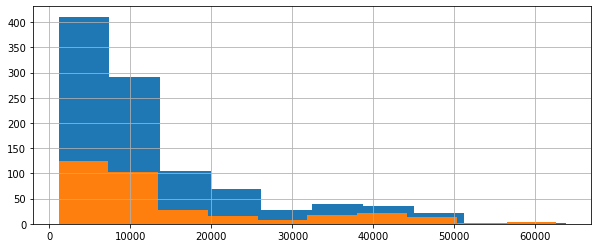

In [553]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.charges.hist(ax=ax)
df_test.charges.hist(ax=ax)

X_train = df_train.drop('charges',axis=1)
X_test = df_test.drop('charges',axis=1)

y_train = df_train['charges']
y_test = df_test['charges']

In [554]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [555]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.7851332028880516


In [556]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.376
Mean Absolute Error (Σ|y - pred|/n): 4,286
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 6,348
Max Error: 30,062


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='charges'>

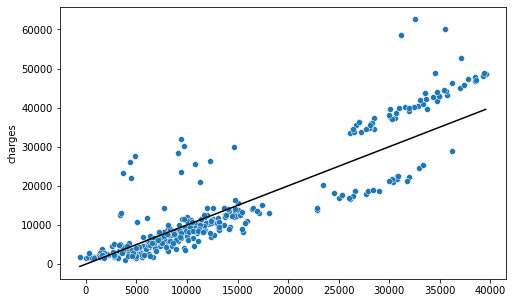

In [557]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [558]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.07164179104477612


How about more than 20%?

In [559]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.6059701492537314


## Linearly Combination
As we mentioned, we can use linearly combination of the independent variables to reduce the correlation between variables while maintaining their features. For example, in the medical data example, we transformed the variable 'bmi' into 'new_bmi' such that new_bmi = bmi * 2 if he smokes and new_bmi = bmi otherwise, and than we remove the 'bmi' and 'smoker' columns. The idea is to increase the bmi of the person if he smokes in thought that as the bmi increases, the charges increase and also when person smokes, therefore we can makes it linear although it's a nominal feature (smoker):

In [560]:
new_df = dtfs[DS.MEDICAL]

# If the person smokes so we multiply the age by 1.2 and otherwise by 1
new_df['new_bmi'] = new_df['bmi'] * (new_df['smoker'] * 2 + 1)
new_df = new_df.drop('bmi', axis=1, inplace=False)
new_df = new_df.drop('smoker', axis=1, inplace=False)

vif = calculate_vif(new_df)
vif

,features,vif_Factor
3,new_bmi,8.67
2,charges,7.35
0,age,3.28
1,children,1.74


By applying these methods, we can reduce the VIF values and improve the stability and interpretability of the model.

### Create a Baseline Regression Model

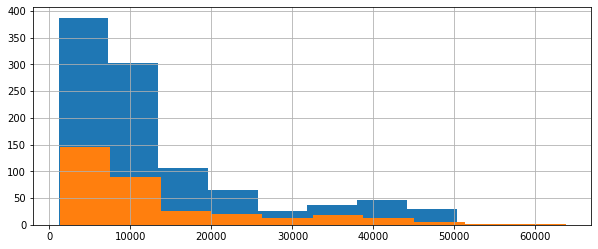

In [561]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.charges.hist(ax=ax)
df_test.charges.hist(ax=ax)

X_train = df_train.drop('charges',axis=1)
X_test = df_test.drop('charges',axis=1)

y_train = df_train['charges']
y_test = df_test['charges']

In [562]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [563]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.8403232676552299


In [564]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.466
Mean Absolute Error (Σ|y - pred|/n): 3,441
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 4,946
Max Error: 22,148


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='charges'>

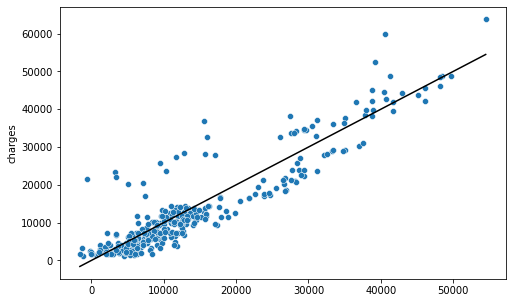

In [565]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [566]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.11343283582089553


How about more than 20%?

In [567]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.5940298507462687


## PCA - Principal Component Analsys
PCA, or Principal Component Analysis, is a widely used technique in data analysis that involves breaking down a dataset into a set of independent factors, with the aim of reducing its dimensionality. This technique is often used to simplify calculations in statistical models, by reducing the number of predictive factors. However, in the context of our current case, we will be leveraging the independence of variables provided by PCA to address the issue of multicollinearity in our model.

,features,vif_Factor
0,0,1.0
1,1,1.0
2,2,1.0


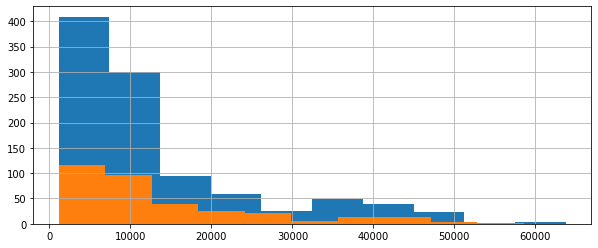

In [568]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# create a sample dataframe
df = dtfs[DS.MEDICAL]
df_train, df_test = train_test_split(df, test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.charges.hist(ax=ax)
df_test.charges.hist(ax=ax)

X_train = df_train.drop('charges', axis=1)
X_test = df_test.drop('charges', axis=1)

y_train = df_train['charges']
y_test = df_test['charges']

# perform PCA to reduce the number of features
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_pca_df = pd.DataFrame(X_train_pca)
vif = calculate_vif(X_pca_df)
vif

Despite retaining the same number of variables as in the original data, it can be observed that the three variables are no longer correlated with each other following the PCA transformation. This enables us to use the new set of three variables as independent variables to medical housing prices.

However, it should be noted that this approach has a significant drawback. The PCA transformation does not maintain the identity of each variable, which makes interpreting the results difficult.

By applying these methods, we can reduce the VIF values and improve the stability and interpretability of the model.

### Create a Baseline Regression Model

In [569]:
from sklearn.linear_model import LinearRegression

# train a linear regression model on the reduced features
model = LinearRegression()
model.fit(X_train_pca, y_train)

# predict the target feature on the test data using the reduced features
prediction = model.predict(X_test_pca)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [570]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.8237272396893645


In [571]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.292
Mean Absolute Error (Σ|y - pred|/n): 3,195
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 5,055
Max Error: 21,817


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='charges'>

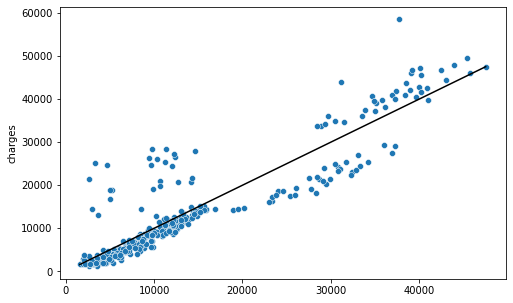

In [572]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [573]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.11641791044776119


How about more than 20%?

In [574]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.4955223880597015


## Conclusions - Medical Charges
Now we can compare between the solutions:

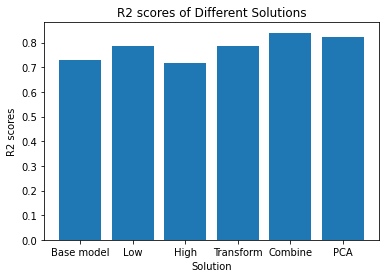

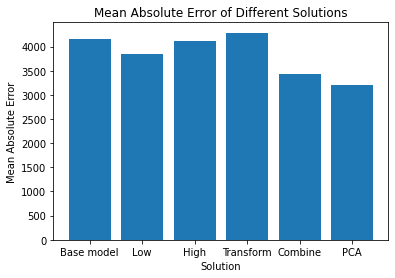

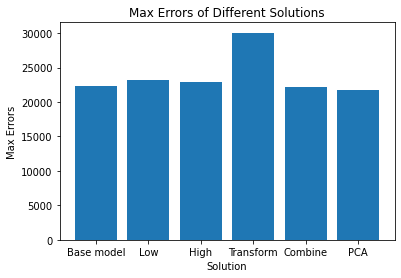

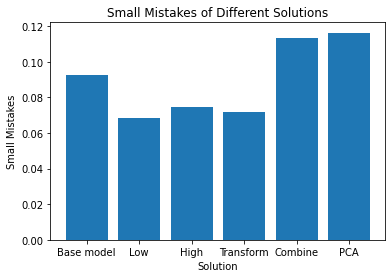

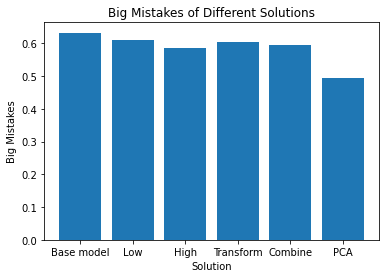

In [575]:
draw_graph(r2_scores, 'R2 scores')
draw_graph(mean_errors, 'Mean Absolute Error')
draw_graph(max_errors, 'Max Errors')
draw_graph(small_mistakes, 'Small Mistakes')
draw_graph(big_mistakes, 'Big Mistakes')

solution_names = ['Base model', 'Low', 'High', 'Combine', 'PCA']
r2_scores = []
mean_errors = []
max_errors = []
small_mistakes = []
big_mistakes = []

We can see that in the origin dataset with all the columns there are features with high correlation with 'charges' and the vif scores are relatively high, 3 of 5 got vif above 5.

When we dropped of the columns which has lower correlation than 0.1 with 'charges' we removed 'children', all of them has lower vif score than before, the highest vif is of 'age' 9.13 and it was 9.18 before.

When we dropped of the columns which has lower correlation than 0.2 with 'charges' we removed also bmi, all of them has lower vif score than before (expecially age), the highest vif is of 'charges' 7.78 and it was 7.81 before.

When we tried to change 'bmi' to 'new_bmi' by substracting the minimal value of bmi (15) from of 'bmi' (from the model with the features which has lower correlation than 0.1 and was better). The vif score of 2 of 4 of the features was decreased, the highest vif is of 'charges' 8.01 and it was 7.81 before.

Additionaly, we tried to use linearly combination of the independent variables to reduce the correlation between variables while maintaining their features. The idea is to increase the bmi of the person if he smokes in thought that as the bmi increases, the charges increase and also when person smokes, therefore we can makes it linear although it's a nominal feature (smoker). The highest vif is of 'new_bmi' 8.56.

Finally, we used PCA to reduce its dimensionality and remove the multi-collinearity issue in the model. Despite retaining the same number of variables as in the original data, it can be observed that the three variables are no longer correlated with each other following the PCA transformation. This enables us to use the new set of three variables as independent variables to predict housing prices.

The worst R-Squared score were the base model and when we removed variables with high correlation with the 'charges' and the best were when we used PCA or linearly combination. The best MSE was also when we used linearly combination or PCA and all the others were worse but close each other. The worst max error was when we used variable transformation by far and all the others were better but close each other.

The most small mistakes were again when we used linearly transforamtion or PCA and all the others were worse but close each other. The fewest big mistakes was when we used PCA and all the others were worse but close each other.

From this, we can infer that linearly combination gives us good results but the best results were when we used PCA. This time' variable selection or variable transforamtion improved the results of the base model but not too much.

# Dataset 4 - Cancer Personal
This dataset contains information about insurance cost.
This data can be used for a lot of purposes such as cost prediction to exemplify the use of linear regression in Machine Learning. It's features are age, sex, bmi, children, smoker, region and charges.

### Identify Multi-Collinearity
As mentioned before, we examine the correlation matrix of all the independent variables. Now, we applied this method to the medical dataset from the data.world, which aims to predict the target death rate based on various information features. In our analysis, we chose a subset of numerical variables to include in the model, and plotted their correlation matrix to check for any high correlations between them.

In [576]:
df = dtfs[DS.CANCER]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.963882,-0.128587,0.010871,0.219067,0.957520,-0.105566,0.079980,-0.026047,-0.110806,-0.107927,0.077267,-0.103546,-0.092584,-0.145028,0.103780,0.224268,-0.263704,0.245992,0.177038,-0.000131,0.061000,0.133070,0.131033,-0.164938,-0.072116,-0.138574,0.020755,0.480718,0.276332,-0.086528,-0.036560
avgDeathsPerYear,0.963882,1.000000,-0.096510,0.005936,0.189414,0.988023,-0.048667,0.086374,-0.020042,-0.136011,-0.134683,0.102863,-0.164573,-0.096243,-0.122790,0.093203,0.209481,-0.254167,0.235851,0.116513,0.061478,0.002737,0.088625,0.105198,-0.137201,-0.019233,-0.179069,0.069639,0.486688,0.285097,-0.120332,-0.076831
TARGET_deathRate,-0.128587,-0.096510,1.000000,0.376033,-0.377156,-0.109513,0.366102,-0.033589,-0.011419,-0.026774,0.019737,-0.062568,-0.229908,0.078894,0.254029,-0.158445,-0.296988,0.379753,-0.440073,-0.372085,0.319756,-0.337199,-0.322015,-0.228443,0.346525,0.388474,-0.158205,0.258829,-0.199772,-0.209761,-0.291756,-0.051311
incidenceRate,0.010871,0.005936,0.376033,1.000000,0.064140,-0.018021,-0.021349,0.094944,0.020339,-0.070816,-0.075830,-0.114925,-0.128565,-0.181979,-0.023155,0.108126,0.108046,0.050472,0.042241,0.041587,0.020524,0.161990,0.173349,0.189013,-0.069795,-0.061571,-0.029996,0.102696,0.076300,-0.208808,-0.141188,-0.103238
medIncome,0.219067,0.189414,-0.377156,0.064140,1.000000,0.177701,-0.796091,0.115285,-0.003541,-0.079002,-0.128884,0.117188,0.342108,-0.316687,-0.212364,0.219625,0.487486,-0.449718,0.708231,0.692095,-0.440293,0.729939,0.786730,0.757948,-0.764296,-0.733614,0.190445,-0.270956,0.465658,0.078734,0.468958,-0.079201
popEst2015,0.957520,0.988023,-0.109513,-0.018021,0.177701,1.000000,-0.039724,0.073192,-0.021496,-0.145278,-0.148584,0.112381,-0.145022,-0.083482,-0.117614,0.088527,0.186542,-0.254249,0.223135,0.115205,0.048669,-0.006393,0.081420,0.091063,-0.141193,-0.020699,-0.172378,0.055595,0.479433,0.299631,-0.097910,-0.061795
povertyPercent,-0.105566,-0.048667,0.366102,-0.021349,-0.796091,-0.039724,1.000000,-0.093313,-0.016437,-0.233281,-0.181874,0.061160,-0.627303,0.302635,0.133819,-0.171781,-0.411651,0.183586,-0.516318,-0.745129,0.648611,-0.814308,-0.743404,-0.674968,0.634122,0.790520,-0.529978,0.528894,-0.168474,0.060031,-0.598793,0.024339
studyPerCap,0.079980,0.086374,-0.033589,0.094944,0.115285,0.073192,-0.093313,1.000000,-0.027249,-0.060887,-0.078092,0.011451,-0.031118,-0.136710,-0.037298,0.081161,0.125690,-0.151372,0.163404,0.171909,-0.045224,0.120519,0.142935,0.155486,-0.113575,-0.082975,0.021907,-0.017010,0.098969,0.003875,-0.051405,-0.024016
MedianAge,-0.026047,-0.020042,-0.011419,0.020339,-0.003541,-0.021496,-0.016437,-0.027249,1.000000,0.075247,0.099255,-0.036585,0.027442,-0.011858,0.017716,-0.003276,-0.008663,0.048341,-0.026124,-0.029754,0.051701,0.019211,-0.008464,-0.012627,0.034639,-0.006858,0.016302,0.018361,-0.054970,-0.017505,-0.005902,0.004128
MedianAgeMale,-0.110806,-0.136011,-0.026774,-0.070816,-0.079002,-0.145278,-0.233281,-0.060887,0.075247,1.000000,0.928813,-0.365616,0.484189,0.121405,0.186905,-0.236731,-0.021145,0.303251,-0.145582,-0.095169,-0.177902,0.054771,-0.190114,-0.217323,0.384922,0.006612,0.416602,-0.260831,-0.316228,-0.265851,0.206939,-0.037352


In the case of the cancer data, it revealed several variables with high correlation to each other. For instance, the total 'avgAnnCount' and 'avgDeathsPerYear' had a correlation of over 0.9.

### Split the data to train and test

<AxesSubplot:>

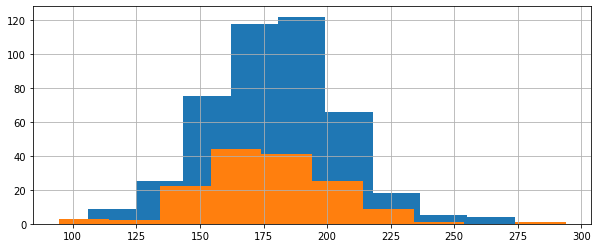

In [577]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.TARGET_deathRate.hist(ax=ax)
df_test.TARGET_deathRate.hist(ax=ax)

## Base Model


### Create a Baseline Regression Model

In [578]:
X_train = df_train.drop('TARGET_deathRate',axis=1)
X_test = df_test.drop('TARGET_deathRate',axis=1)

y_train = df_train['TARGET_deathRate']
y_test = df_test['TARGET_deathRate']

In [579]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [580]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.335970247724765


In [581]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.093
Mean Absolute Error (Σ|y - pred|/n): 16
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 22
Max Error: 115


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='TARGET_deathRate'>

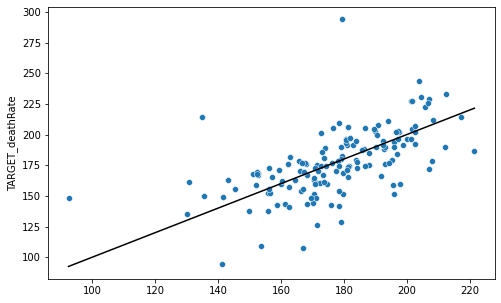

In [582]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [583]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.38513513513513514


How about more than 20%?

In [584]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.0945945945945946


Let's see the vif scores of the origin data:

In [585]:
vif = calculate_vif(df)
vif

,features,vif_Factor
21,PctPrivateCoverage,3027.32
22,PctPrivateCoverageAlone,2417.15
24,PctPublicCoverage,1411.24
10,MedianAgeFemale,708.16
12,PercentMarried,687.99
30,PctMarriedHouseholds,607.89
9,MedianAgeMale,556.44
25,PctPublicCoverageAlone,537.67
15,PctSomeCol18_24,385.38
19,PctEmployed16_Over,300.37


## Variable Selection - Low Correlation

Now, let's try to fix the collinearity. In the cancer data example, we observed that 'PctPublicCoverageAlone' and '0.PctBachDeg25_Over' have the two highest correlations with the dependent variable, 'TARGET_deathRate'. Therefore, we will include them in the model and eliminate others with low correlation with 'TARGET_deathRate', for example lower than 0.3.

In [586]:
low_corr_cols = corr[corr['TARGET_deathRate'].abs() < 0.3].index.tolist()

new_df = df.drop(low_corr_cols, axis=1, inplace=False)
vif = calculate_vif(new_df)

vif

,features,vif_Factor
8,PctPrivateCoverage,2451.61
9,PctPrivateCoverageAlone,1593.13
10,PctPublicCoverage,801.46
11,PctPublicCoverageAlone,369.33
6,PctEmployed16_Over,142.39
1,incidenceRate,96.17
2,medIncome,84.83
4,PctHS25_Over,76.42
0,TARGET_deathRate,72.65
3,povertyPercent,36.16


### Create a Baseline Regression Model

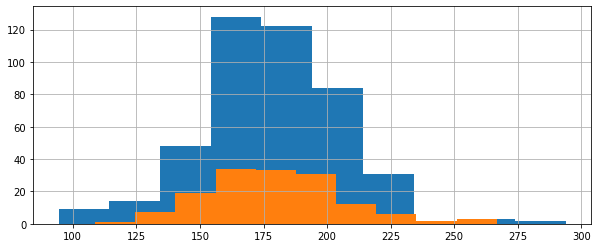

In [587]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.TARGET_deathRate.hist(ax=ax)
df_test.TARGET_deathRate.hist(ax=ax)

X_train = df_train.drop('TARGET_deathRate',axis=1)
X_test = df_test.drop('TARGET_deathRate',axis=1)

y_train = df_train['TARGET_deathRate']
y_test = df_test['TARGET_deathRate']

In [588]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [589]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.4249620730064323


In [590]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.088
Mean Absolute Error (Σ|y - pred|/n): 15
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 21
Max Error: 73


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='TARGET_deathRate'>

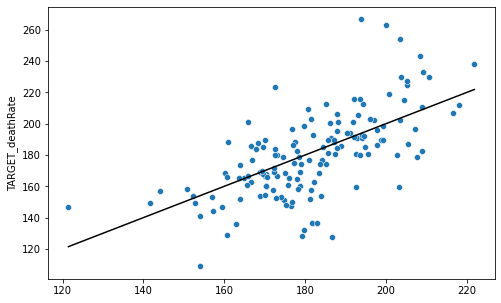

In [591]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [592]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.3918918918918919


How about more than 20%?

In [594]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.08108108108108109


## Variable Selection - High Correlation

Again, let's try to fix the collinearity. In the cars data example, we observed that 'PctPublicCoverageAlone' and '0.PctBachDeg25_Over' have the highest correlation with the dependent variable, TARGET_deathRate. Therefore, we will eliminate others, in this case the correlation lower than 0.35.

In [595]:
low_corr_cols = corr[corr['TARGET_deathRate'].abs() < 0.35].index.tolist()
new_df = df.drop(low_corr_cols, axis=1, inplace=False)
vif = calculate_vif(new_df)
vif

,features,vif_Factor
6,PctEmployed16_Over,92.78
1,incidenceRate,87.71
0,TARGET_deathRate,71.78
2,medIncome,62.05
4,PctHS25_Over,51.39
7,PctPublicCoverageAlone,33.76
3,povertyPercent,29.04
5,PctBachDeg25_Over,28.52


### Create a Baseline Regression Model

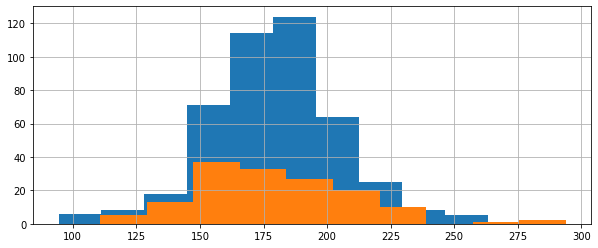

In [596]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.TARGET_deathRate.hist(ax=ax)
df_test.TARGET_deathRate.hist(ax=ax)

X_train = df_train.drop('TARGET_deathRate',axis=1)
X_test = df_test.drop('TARGET_deathRate',axis=1)

y_train = df_train['TARGET_deathRate']
y_test = df_test['TARGET_deathRate']

In [597]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [598]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.3583355721348961


In [599]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.105
Mean Absolute Error (Σ|y - pred|/n): 18
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 25
Max Error: 117


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='TARGET_deathRate'>

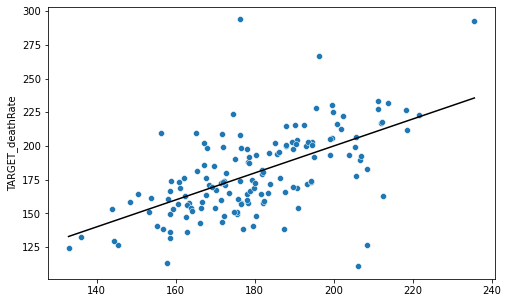

In [600]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [601]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.32432432432432434


How about more than 20%?

In [602]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.10135135135135136


## Linearly Combination
As we mentioned, we can use linearly combination of the independent variables to reduce the correlation between variables while maintaining their features. We will show the correlation matrix and choose two independent variables and combine them.

In [603]:
new_df = dtfs[DS.CANCER]
corr = new_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.963882,-0.128587,0.010871,0.219067,0.957520,-0.105566,0.079980,-0.026047,-0.110806,-0.107927,0.077267,-0.103546,-0.092584,-0.145028,0.103780,0.224268,-0.263704,0.245992,0.177038,-0.000131,0.061000,0.133070,0.131033,-0.164938,-0.072116,-0.138574,0.020755,0.480718,0.276332,-0.086528,-0.036560
avgDeathsPerYear,0.963882,1.000000,-0.096510,0.005936,0.189414,0.988023,-0.048667,0.086374,-0.020042,-0.136011,-0.134683,0.102863,-0.164573,-0.096243,-0.122790,0.093203,0.209481,-0.254167,0.235851,0.116513,0.061478,0.002737,0.088625,0.105198,-0.137201,-0.019233,-0.179069,0.069639,0.486688,0.285097,-0.120332,-0.076831
TARGET_deathRate,-0.128587,-0.096510,1.000000,0.376033,-0.377156,-0.109513,0.366102,-0.033589,-0.011419,-0.026774,0.019737,-0.062568,-0.229908,0.078894,0.254029,-0.158445,-0.296988,0.379753,-0.440073,-0.372085,0.319756,-0.337199,-0.322015,-0.228443,0.346525,0.388474,-0.158205,0.258829,-0.199772,-0.209761,-0.291756,-0.051311
incidenceRate,0.010871,0.005936,0.376033,1.000000,0.064140,-0.018021,-0.021349,0.094944,0.020339,-0.070816,-0.075830,-0.114925,-0.128565,-0.181979,-0.023155,0.108126,0.108046,0.050472,0.042241,0.041587,0.020524,0.161990,0.173349,0.189013,-0.069795,-0.061571,-0.029996,0.102696,0.076300,-0.208808,-0.141188,-0.103238
medIncome,0.219067,0.189414,-0.377156,0.064140,1.000000,0.177701,-0.796091,0.115285,-0.003541,-0.079002,-0.128884,0.117188,0.342108,-0.316687,-0.212364,0.219625,0.487486,-0.449718,0.708231,0.692095,-0.440293,0.729939,0.786730,0.757948,-0.764296,-0.733614,0.190445,-0.270956,0.465658,0.078734,0.468958,-0.079201
popEst2015,0.957520,0.988023,-0.109513,-0.018021,0.177701,1.000000,-0.039724,0.073192,-0.021496,-0.145278,-0.148584,0.112381,-0.145022,-0.083482,-0.117614,0.088527,0.186542,-0.254249,0.223135,0.115205,0.048669,-0.006393,0.081420,0.091063,-0.141193,-0.020699,-0.172378,0.055595,0.479433,0.299631,-0.097910,-0.061795
povertyPercent,-0.105566,-0.048667,0.366102,-0.021349,-0.796091,-0.039724,1.000000,-0.093313,-0.016437,-0.233281,-0.181874,0.061160,-0.627303,0.302635,0.133819,-0.171781,-0.411651,0.183586,-0.516318,-0.745129,0.648611,-0.814308,-0.743404,-0.674968,0.634122,0.790520,-0.529978,0.528894,-0.168474,0.060031,-0.598793,0.024339
studyPerCap,0.079980,0.086374,-0.033589,0.094944,0.115285,0.073192,-0.093313,1.000000,-0.027249,-0.060887,-0.078092,0.011451,-0.031118,-0.136710,-0.037298,0.081161,0.125690,-0.151372,0.163404,0.171909,-0.045224,0.120519,0.142935,0.155486,-0.113575,-0.082975,0.021907,-0.017010,0.098969,0.003875,-0.051405,-0.024016
MedianAge,-0.026047,-0.020042,-0.011419,0.020339,-0.003541,-0.021496,-0.016437,-0.027249,1.000000,0.075247,0.099255,-0.036585,0.027442,-0.011858,0.017716,-0.003276,-0.008663,0.048341,-0.026124,-0.029754,0.051701,0.019211,-0.008464,-0.012627,0.034639,-0.006858,0.016302,0.018361,-0.054970,-0.017505,-0.005902,0.004128
MedianAgeMale,-0.110806,-0.136011,-0.026774,-0.070816,-0.079002,-0.145278,-0.233281,-0.060887,0.075247,1.000000,0.928813,-0.365616,0.484189,0.121405,0.186905,-0.236731,-0.021145,0.303251,-0.145582,-0.095169,-0.177902,0.054771,-0.190114,-0.217323,0.384922,0.006612,0.416602,-0.260831,-0.316228,-0.265851,0.206939,-0.037352


For example, in the cancer data example, we will choose transform the variables 'incidenceRate' and 'medIncome' into 'medIncome_incidenceRate' such that medIncome_incidenceRate = incidenceRate * 100 + medIncome because the idea is to increase the 'incidenceRate' in order of magnitude in contrast to 'medIncome' becuase it affects probably more on 'TARGET_deathRate'.

In [604]:
new_df['medIncome_incidenceRate'] = new_df['incidenceRate'] * 100 + new_df['medIncome']
new_df = new_df.drop('incidenceRate', axis=1, inplace=False)
new_df = new_df.drop('medIncome', axis=1, inplace=False)

vif = calculate_vif(new_df)
vif

,features,vif_Factor
19,PctPrivateCoverage,3026.89
20,PctPrivateCoverageAlone,2415.89
22,PctPublicCoverage,1391.97
8,MedianAgeFemale,700.45
10,PercentMarried,678.42
28,PctMarriedHouseholds,572.62
7,MedianAgeMale,555.13
23,PctPublicCoverageAlone,533.08
13,PctSomeCol18_24,384.31
17,PctEmployed16_Over,300.12


By applying these methods, we can reduce the VIF values and improve the stability and interpretability of the model.

### Create a Baseline Regression Model

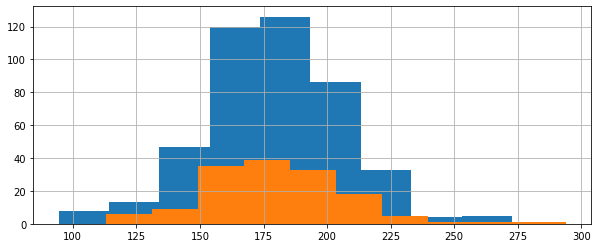

In [605]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, 
                      test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.TARGET_deathRate.hist(ax=ax)
df_test.TARGET_deathRate.hist(ax=ax)

X_train = df_train.drop('TARGET_deathRate',axis=1)
X_test = df_test.drop('TARGET_deathRate',axis=1)

y_train = df_train['TARGET_deathRate']
y_test = df_test['TARGET_deathRate']

In [606]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
prediction = model.fit(X_train,y_train).predict(X_test)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [607]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.31654974103893263


In [608]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.093
Mean Absolute Error (Σ|y - pred|/n): 16
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 22
Max Error: 115


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='TARGET_deathRate'>

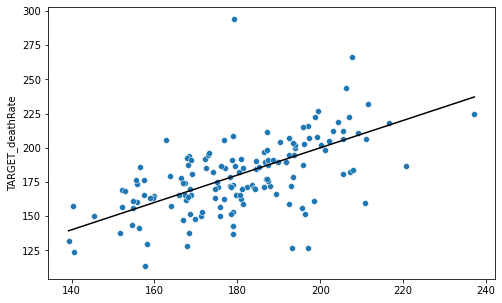

In [609]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [610]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.38513513513513514


How about more than 20%?

In [611]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.10810810810810811


## PCA - Principal Component Analsys
PCA, or Principal Component Analysis, is a widely used technique in data analysis that involves breaking down a dataset into a set of independent factors, with the aim of reducing its dimensionality. This technique is often used to simplify calculations in statistical models, by reducing the number of predictive factors. However, in the context of our current case, we will be leveraging the independence of variables provided by PCA to address the issue of multicollinearity in our model.

,features,vif_Factor
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0


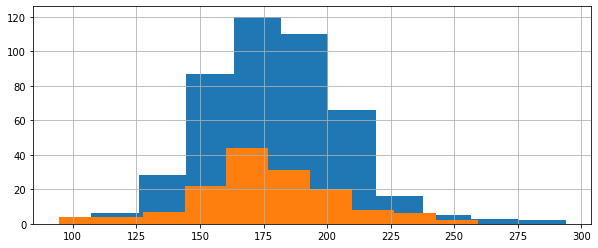

In [612]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# create a sample dataframe
df = dtfs[DS.CANCER]
df_train, df_test = train_test_split(df, test_size=0.25)

fig, ax = plt.subplots(figsize=(10,4))
df_train.TARGET_deathRate.hist(ax=ax)
df_test.TARGET_deathRate.hist(ax=ax)

X_train = df_train.drop('TARGET_deathRate', axis=1)
X_test = df_test.drop('TARGET_deathRate', axis=1)

y_train = df_train['TARGET_deathRate']
y_test = df_test['TARGET_deathRate']

# perform PCA to reduce the number of features
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_pca_df = pd.DataFrame(X_train_pca)
vif = calculate_vif(X_pca_df)
vif

Despite retaining the same number of variables as in the original data, it can be observed that the six variables are no longer correlated with each other following the PCA transformation. This enables us to use the new set of six variables as independent variables to predict housing prices.

However, it should be noted that this approach has a significant drawback. The PCA transformation does not maintain the identity of each variable, which makes interpreting the results difficult. To handle with that, we seperated the SalePrice from the other features.

By applying these methods, we can reduce the VIF values and improve the stability and interpretability of the model.

### Create a Baseline Regression Model

In [613]:
from sklearn.linear_model import LinearRegression

# train a linear regression model on the reduced features
model = LinearRegression()
model.fit(X_train_pca, y_train)

# predict the target feature on the test data using the reduced features
prediction = model.predict(X_test_pca)

### Evaluate how good is the model
Many metrics exist for evaluating the regression over the test data. Let's start with r^2: R Squared is the squared sum of differences from the actual values and the predicted values, divided by the squared differences from the mean (i.e var*n)

High R2 means that the model "explains" a lot of the variance, i.e. that the behaviour is "predicted". It *doesn't* directly imply whether the model is right! 
Let's see more metrics:

In [614]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

score = r2_score(y_test, prediction)
print(score)
r2_scores.append(score)

0.22938081639847918


In [615]:
print("Mean Absolute Perc Error (Σ(|y - pred|/y)/n):","{:,.3f}".format(mean_absolute_percentage_error(y_test,prediction)))
print("Mean Absolute Error (Σ|y - pred|/n):", "{:,.0f}".format(mean_absolute_error(y_test, prediction)))
mean_errors.append(round(mean_absolute_error(y_test, prediction), 2))
print("Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)):", "{:,.0f}".format(np.sqrt(mean_squared_error(y_test, prediction))))

# residuals
residuals = y_test - prediction
max_error = (y_test - prediction).abs().max()
max_errors.append(round(max_error, 2))
print("Max Error:", "{:,.0f}".format(max_error))

Mean Absolute Perc Error (Σ(|y - pred|/y)/n): 0.105
Mean Absolute Error (Σ|y - pred|/n): 17
Root Mean Squared Error (sqrt(Σ(y - pred)^2/n)): 25
Max Error: 142


We now plot the true values against the predicted values. 
In the regression line, the predicted values are always on the function y=x

<AxesSubplot:ylabel='TARGET_deathRate'>

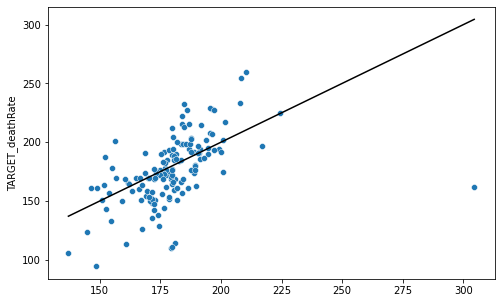

In [616]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x=prediction, y=y_test, ax=ax)
sns.lineplot(x=prediction, y=prediction, ax=ax, color='black')

So we can see that we have "small" mistakes and "big" mistakes. Let's look into that. How many time did our model achieve low estimation error (error less than 5%)?:

In [617]:
rel_res = ((y_test - prediction) / y_test).abs()
x = len(rel_res[rel_res < 0.05]) / len(rel_res)
print(x)
small_mistakes.append(x)

0.39864864864864863


How about more than 20%?

In [618]:
x = len(rel_res[rel_res > 0.2]) / len(rel_res)
print(x)
big_mistakes.append(x)

0.10810810810810811


## Conclusions - Cancer Target Deathrate
Now we can compare between the solutions:

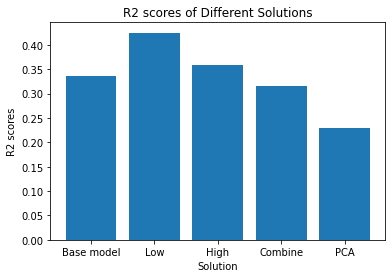

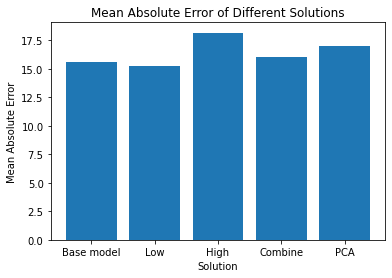

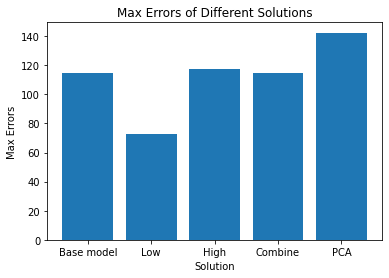

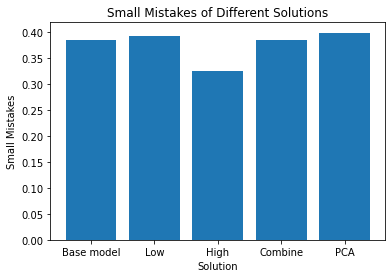

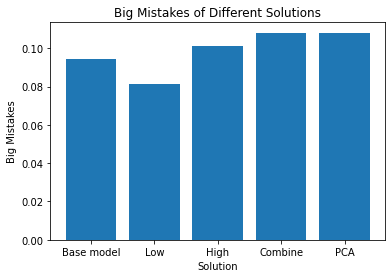

In [619]:
draw_graph(r2_scores, 'R2 scores')
draw_graph(mean_errors, 'Mean Absolute Error')
draw_graph(max_errors, 'Max Errors')
draw_graph(small_mistakes, 'Small Mistakes')
draw_graph(big_mistakes, 'Big Mistakes')

We can see that in the origin dataset with all the columns there are features with high correlation with 'TARGET_deathRate' and the vif scores are relatively high, most of them got vif above 15.

When we dropped of the columns which has lower correlation than 0.3 with 'TARGET_deathRate', almost all of them has lower vif score than before, the highest vif is of 'PctPrivateCoverage' 2451 and it was 3027 before.

When we dropped of the columns which has lower correlation than 0.35 with 'TARGET_deathRate', all of them has lower vif score than before, the highest vif is of 'PctEmployed16_Over' 92.78 and it was 300.37 before.

Additionaly, we tried to use linearly combination of the independent variables to reduce the correlation between variables while maintaining their features. The idea is to increase the 'incidenceRate' in order of magnitude in contrast to 'medIncome' becuase it affects probably more on 'TARGET_deathRate'. The highest vif is of 'PctPrivateCoveragev' 2449 and it was 2551 without the combination.

Finally, we used PCA to reduce its dimensionality and remove the multi-collinearity issue in the model. Despite retaining the same number of variables as in the original data, it can be observed that the six variables are no longer correlated with each other following the PCA transformation. This enables us to use the new set of six variables as independent variables to predict housing prices.

The best R-Squared score was when we removed variables with low correlation with the 'TARGET_deathRate' by far and the worst was when we used PCA. The best MSE was also when we removed variables with low correlation but it was the worst when we removed variables with high correlation. The best max error was again when we removed variables with low correlation and the worst when we used PCA.

The most small mistakes were when we removed variables with low correlation or used PCA and the fewest was when we removed variables with high correlation. The fewest big mistakes was when we removed variables with low correlation and all the others were worse but close each other.

From this, we can infer that removing variables with low correlation (0.3 in this case) gives us the best and this time PCA gives us the worst results.

# Summary and conclusions
It is important to check for the issue of Multi-Collinearity prior to building a regression model. VIF can be used to easily assess each independent variable to determine whether they have high correlations with each other. A correlation matrix is also useful in selecting important factors when unsure of which variables to choose for the model. Additionally, the correlation matrix can help to understand why certain variables may have high VIF values.

We found that removing features that has relatively low correlation with the labels in most of the cases can improve the model and the vif scores, but we need to be careful not removing features that has too high correlation with the labels because it impairs the performance of the model although the vif scores can be better.

Transformations and linearly combination can sometimes improve the model but we need to find and check what is the best change for each feature and it's not always work. PCA can also improve the model but sometimes it can harm, and it should be noted that this approach has a significant drawback. The PCA transformation does not maintain the identity of each variable, which makes interpreting the results difficult.

While there are methods to address multi-collinearity, such as PCA, this approach can lead to the loss of model interpretability and the need to re-transform the data for application to a new set. It is best to reduce correlation by carefully selecting the appropriate variables and transforming them as needed.

In cases where a variable has a relatively high VIF value but is important in predicting the result, it is up to the individual to decide whether to keep or discard the variable. Trial and error is often necessary, including testing different sets of variables, building the model, and checking for overfitting against test data.

However, even after performing these checks, it is important to remember that there are other statistical assumptions that should be considered before constructing a model.